In [1]:
import pandas as pd
import seaborn as sns
import pandas_profiling as pp 
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype


In [2]:
# Read MAT file
df_MAT = pd.read_excel('MAT_general_NL.xlsx')
df_MAT.info()
df_MAT.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2406 entries, 0 to 2405
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Apellido(s)                        2406 non-null   object 
 1   Nombre                             2405 non-null   object 
 2   ESCUELA                            2405 non-null   object 
 3   Grupo                              2368 non-null   object 
 4   CCT                                2405 non-null   object 
 5   Tiempo empleado                    2405 non-null   object 
 6   Prueba diagnóstica de Matemáticas  2405 non-null   float64
 7   NIVEL DE LOGRO                     2405 non-null   object 
 8   Respuesta 1                        2405 non-null   object 
 9   Respuesta 2                        2405 non-null   object 
 10  Respuesta 3                        2405 non-null   object 
 11  Respuesta 4                        2405 non-null   objec

,Apellido(s),Nombre,ESCUELA,Grupo,CCT,Tiempo empleado,Prueba diagnóstica de Matemáticas,NIVEL DE LOGRO,Respuesta 1,Respuesta 2,...,Respuesta 12,Respuesta 13,Respuesta 14,Respuesta 15,TRespuesta 1,TRespuesta 2,TRespuesta 3,TRespuesta 4,TRespuesta 5,TRespuesta 6
0,ACEVEDO PEREZ,ANA LAURA,LAZARO CARDENAS,A,CCT 15DES0025A,1 hora 27 mins,14.0,IV,b,c,...,a,a,c,c,Fácil,No,-,-,No,-
1,AGUILAR CHOLULA,ASHLEY MAYUMI,LAZARO CARDENAS,A,CCT 15DES0025A,20 mins 25 segundos,14.0,IV,b,c,...,a,a,c,c,Difícil,No,-,-,No,-
2,GARCIA DE LA CADENA RODRIGUEZ,JUAN CARLOS,LAZARO CARDENAS,A,CCT 15DES0025A,28 mins 29 segundos,13.0,IV,b,c,...,c,a,c,c,Fácil,Si,Hermana,Algunas veces,No,-
3,QUIJANO PARRA,YAEL,LAZARO CARDENAS,A,CCT 15DES0025A,5 horas 7 mins,14.0,IV,b,c,...,b,a,c,c,Fácil,No,-,-,Si,Libros de texto\n\n; Tus apuntes
4,RODRIGUEZ HERNANDEZ,ULISES SANTIAGO,LAZARO CARDENAS,A,CCT 15DES0025A,13 mins 49 segundos,15.0,IV,b,c,...,a,a,c,c,Difícil,Si,Mamá\n\n; Hermana,Algunas veces,No,-


In [3]:
# forming ProfileReport for MAT file and save 
# as output.html file 
profile_MAT = pp.ProfileReport(df_MAT) 
profile_MAT.to_file("output_MAT.html")

In [4]:
# Replace to unique name
df_MAT['ESCUELA']=df_MAT['ESCUELA'].replace('Secundaria Técnica  "Tlamacazcalli"', 'TLAMACAZCALLI')
# Drop data with empty ESCUELA
df_MAT = df_MAT[df_MAT['ESCUELA'].notnull()]
# Define categorical variables
ordered_groups = ['A','B','C','D','E','F','G','H']
ordered_nivel = ['I','II','III','IV']
ordered_ESCUELA = ['ESCUELA SECUNDARIA TECNICA NUM. 57 GRAL. PORFIRIO DIAZ',
        'ESCUELA SECUNDARIA TECNICA NUM. 55 XOLOTL',
        'BICENTENARIO DE LA INDEPENDENCIA DE MEXICO',             
        'JACINTO UC DE LOS SANTOS CANEK',
        'TLAMACAZCALLI',   
        'EMMA GODOY',
        'CALMECAC',    
        'TELESECUNDARIA LIC. LUIS DONALDO COLOSIO MURRIETA',
        'IKRAM ANTAKI', 
        'JUAN ALVAREZ',     
        'CUAUHTEMOCZIN',
        'ESCUELA SECUNDARIA TECNICA NUM. 23', 
        'SOR JUANA I. DE LA CRUZ',   
        'LAZARO CARDENAS']

df_MAT['Grupo'].astype(CategoricalDtype(categories=ordered_groups, ordered=True))
df_MAT['NIVEL DE LOGRO'].astype(CategoricalDtype(categories=ordered_nivel, ordered=True))
df_MAT['ESCUELA'].astype(CategoricalDtype(categories=ordered_ESCUELA, ordered=True))


0                                         LAZARO CARDENAS
1                                         LAZARO CARDENAS
2                                         LAZARO CARDENAS
3                                         LAZARO CARDENAS
4                                         LAZARO CARDENAS
                              ...                        
2400    TELESECUNDARIA LIC. LUIS DONALDO COLOSIO MURRIETA
2401    TELESECUNDARIA LIC. LUIS DONALDO COLOSIO MURRIETA
2402    TELESECUNDARIA LIC. LUIS DONALDO COLOSIO MURRIETA
2403    TELESECUNDARIA LIC. LUIS DONALDO COLOSIO MURRIETA
2404    TELESECUNDARIA LIC. LUIS DONALDO COLOSIO MURRIETA
Name: ESCUELA, Length: 2405, dtype: category
Categories (14, object): ['ESCUELA SECUNDARIA TECNICA NUM. 57 GRAL. PORF... < 'ESCUELA SECUNDARIA TECNICA NUM. 55 XOLOTL' < 'BICENTENARIO DE LA INDEPENDENCIA DE MEXICO' < 'JACINTO UC DE LOS SANTOS CANEK' ... 'CUAUHTEMOCZIN' < 'ESCUELA SECUNDARIA TECNICA NUM. 23' < 'SOR JUANA I. DE LA CRUZ' < 'LAZARO CARDENAS']

In [5]:
df_MAT['Grupo'].value_counts()

A    418
B    389
F    384
C    368
E    368
D    339
G     53
I     25
H     24
Name: Grupo, dtype: int64

In [6]:
df_MAT['NIVEL DE LOGRO'].value_counts()

III    822
I      572
II     531
IV     480
Name: NIVEL DE LOGRO, dtype: int64

In [7]:
df_MAT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2405 entries, 0 to 2404
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Apellido(s)                        2405 non-null   object 
 1   Nombre                             2405 non-null   object 
 2   ESCUELA                            2405 non-null   object 
 3   Grupo                              2368 non-null   object 
 4   CCT                                2405 non-null   object 
 5   Tiempo empleado                    2405 non-null   object 
 6   Prueba diagnóstica de Matemáticas  2405 non-null   float64
 7   NIVEL DE LOGRO                     2405 non-null   object 
 8   Respuesta 1                        2405 non-null   object 
 9   Respuesta 2                        2405 non-null   object 
 10  Respuesta 3                        2405 non-null   object 
 11  Respuesta 4                        2405 non-null   objec

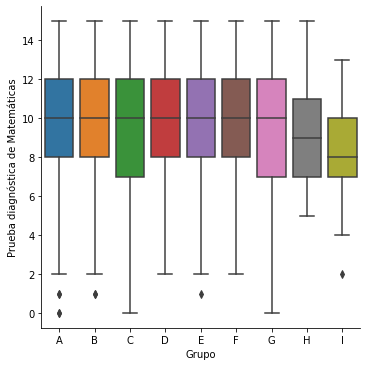

In [9]:
sns.catplot(x="Grupo", y="Prueba diagnóstica de Matemáticas", kind="box", data=df_MAT)

In [11]:
grouped_MAT = df_MAT.groupby('ESCUELA')

#for name,group in grouped_MAT:
#   sns.catplot(x="Grupo", y="Prueba_diagnóstica_de_Matemáticas", kind="box", data=grouped_MAT)
 
print(grouped_MAT['Prueba diagnóstica de Matemáticas'].agg([np.sum, np.mean, np.std]))

                                                       sum       mean  \
ESCUELA                                                                 
BICENTENARIO DE LA INDEPENDENCIA DE MEXICO          1959.0   9.556098   
CALMECAC                                            1683.0   9.728324   
CUAUHTEMOCZIN                                       1303.0   9.048611   
EMMA GODOY                                          1755.0   9.486486   
ESCUELA SECUNDARIA TECNICA NUM. 23                  1277.0   9.748092   
ESCUELA SECUNDARIA TECNICA NUM. 55 XOLOTL           2005.0   9.282407   
ESCUELA SECUNDARIA TECNICA NUM. 57 GRAL. PORFIR...  2310.0   9.352227   
IKRAM ANTAKI                                        1614.0   9.962963   
JACINTO UC DE LOS SANTOS CANEK                      2052.0  10.108374   
JUAN ALVAREZ                                        1467.0   9.845638   
LAZARO CARDENAS                                      958.0   9.979167   
SOR JUANA I. DE LA CRUZ                            

In [12]:
grouped_MAT.describe()

Prueba diagnóstica de Matemáticas  \
                                                                               count   
ESCUELA                                                                                
BICENTENARIO DE LA INDEPENDENCIA DE MEXICO                                     205.0   
CALMECAC                                                                       173.0   
CUAUHTEMOCZIN                                                                  144.0   
EMMA GODOY                                                                     185.0   
ESCUELA SECUNDARIA TECNICA NUM. 23                                             131.0   
ESCUELA SECUNDARIA TECNICA NUM. 55 XOLOTL                                      216.0   
ESCUELA SECUNDARIA TECNICA NUM. 57 GRAL. PORFIR...                             247.0   
IKRAM ANTAKI                                                                   162.0   
JACINTO UC DE LOS SANTOS CANEK                                                 203.0   
JUAN ALVAREZ                                                                   149.0   
LAZARO CARDENAS                                                                 96.0   
SOR JUANA I. DE LA CRUZ                                                        122.0   
TELESECUNDARIA LIC. LUIS DONALDO COLOSIO MURRIETA                              173.0   
TLAMACAZCALLI                                                                  199.0   

                                                                              \
                                                         mean       std  min   
ESCUELA                                                                        
BICENTENARIO DE LA INDEPENDENCIA DE MEXICO           9.556098  2.811570  0.0   
CALMECAC                                             9.728324  2.857295  0.0   
CUAUHTEMOCZIN                                        9.048611  3.127433  0.0   
EMMA GODOY                                           9.486486  3.174470  2.0   
ESCUELA SECUNDARIA TECNICA NUM. 23                   9.748092  2.943947  2.0   
ESCUELA SECUNDARIA TECNICA NUM. 55 XOLOTL            9.282407  3.197218  1.0   
ESCUELA SECUNDARIA TECNICA NUM. 57 GRAL. PORFIR...   9.352227  3.390779  1.0   
IKRAM ANTAKI                                         9.962963  3.304221  0.0   
JACINTO UC DE LOS SANTOS CANEK                      10.108374  3.394532  2.0   
JUAN ALVAREZ                                         9.845638  2.670471  2.0   
LAZARO CARDENAS                                      9.979167  3.125377  4.0   
SOR JUANA I. DE LA CRUZ                              9.991803  2.511119  5.0   
TELESECUNDARIA LIC. LUIS DONALDO COLOSIO MURRIETA    9.080925  2.890308  0.0   
TLAMACAZCALLI                                       10.447236  2.824135  3.0   

                                                                            
                                                    25%   50%    75%   max  
ESCUELA                                                                     
BICENTENARIO DE LA INDEPENDENCIA DE MEXICO          8.0  10.0  11.00  15.0  
CALMECAC                                            8.0  10.0  12.00  15.0  
CUAUHTEMOCZIN                                       7.0   9.0  12.00  15.0  
EMMA GODOY                                          7.0  10.0  12.00  15.0  
ESCUELA SECUNDARIA TECNICA NUM. 23                  8.0  10.0  12.00  15.0  
ESCUELA SECUNDARIA TECNICA NUM. 55 XOLOTL           7.0  10.0  11.00  15.0  
ESCUELA SECUNDARIA TECNICA NUM. 57 GRAL. PORFIR...  7.0   9.0  12.00  15.0  
IKRAM ANTAKI                                        8.0  10.0  13.00  15.0  
JACINTO UC DE LOS SANTOS CANEK                      8.0  10.0  13.00  15.0  
JUAN ALVAREZ                                        8.0  10.0  12.00  15.0  
LAZARO CARDENAS                                     7.0  10.0  12.25  15.0  
SOR JUANA I. DE LA CRUZ                             8.0  10.0  12.00  15.0  
TELESECUNDARIA LIC. LUIS DONALDO COLOS

In [13]:
grouped_MAT.head()

,Apellido(s),Nombre,ESCUELA,Grupo,CCT,Tiempo empleado,Prueba diagnóstica de Matemáticas,NIVEL DE LOGRO,Respuesta 1,Respuesta 2,...,Respuesta 12,Respuesta 13,Respuesta 14,Respuesta 15,TRespuesta 1,TRespuesta 2,TRespuesta 3,TRespuesta 4,TRespuesta 5,TRespuesta 6
0,ACEVEDO PEREZ,ANA LAURA,LAZARO CARDENAS,A,CCT 15DES0025A,1 hora 27 mins,14.0,IV,b,c,...,a,a,c,c,Fácil,No,-,-,No,-
1,AGUILAR CHOLULA,ASHLEY MAYUMI,LAZARO CARDENAS,A,CCT 15DES0025A,20 mins 25 segundos,14.0,IV,b,c,...,a,a,c,c,Difícil,No,-,-,No,-
2,GARCIA DE LA CADENA RODRIGUEZ,JUAN CARLOS,LAZARO CARDENAS,A,CCT 15DES0025A,28 mins 29 segundos,13.0,IV,b,c,...,c,a,c,c,Fácil,Si,Hermana,Algunas veces,No,-
3,QUIJANO PARRA,YAEL,LAZARO CARDENAS,A,CCT 15DES0025A,5 horas 7 mins,14.0,IV,b,c,...,b,a,c,c,Fácil,No,-,-,Si,Libros de texto\n\n; Tus apuntes
4,RODRIGUEZ HERNANDEZ,ULISES SANTIAGO,LAZARO CARDENAS,A,CCT 15DES0025A,13 mins 49 segundos,15.0,IV,b,c,...,a,a,c,c,Difícil,Si,Mamá\n\n; Hermana,Algunas veces,No,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,TAPIA RAMIREZ,ANA DASHA,TELESECUNDARIA LIC. LUIS DONALDO COLOSIO MURRIETA,A,CCT 15DTV0104T,39 mins 55 segundos,15.0,IV,b,c,...,a,a,c,c,Difícil,No,-,-,No,-
2233,TINOCO MACEDO,DYLAN EMILIANO,TELESECUNDARIA LIC. LUIS DONALDO COLOSIO MURRIETA,A,CCT 15DTV0104T,57 mins 6 segundos,13.0,IV,b,c,...,a,a,c,c,Fácil,No,-,Nunca,Si,Páginas de Internet
2234,ACEVEDO ONOFRE,ESTEBAN SAUL,TELESECUNDARIA LIC. LUIS DONALDO COLOSIO MURRIETA,A,CCT 15DTV0104T,34 mins 9 segundos,11.0,III,b,a,...,a,a,c,c,Fácil,Si,Mamá,Siempre,No,-
2235,CALIXTO RAMIREZ,EILEEN ATZIRY,TELESECUNDARIA LIC. LUIS DONALDO COLOSIO MURRIETA,A,CCT 15DTV0104T,37 mins 25 segundos,11.0,III,b,c,...,d,a,c,c,Fácil,No,-,-,Si,Libros de texto


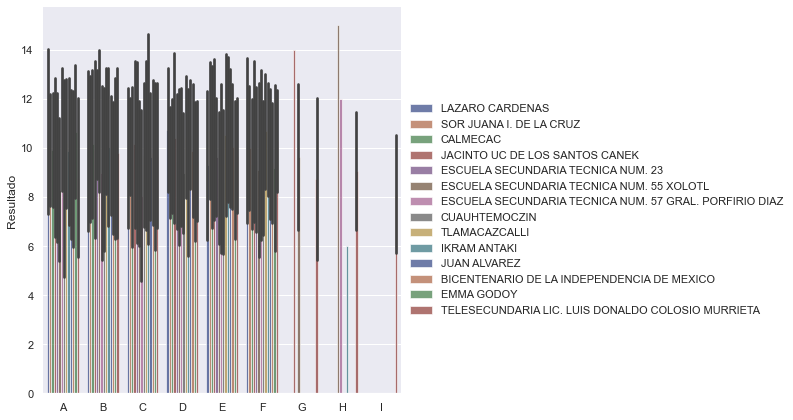

In [15]:
sns.set(rc={'figure.figsize':(5,20)})
g = sns.catplot(
    data=df_MAT, kind="bar",
    x="Grupo", y="Prueba diagnóstica de Matemáticas", hue="ESCUELA",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Resultado")
g.legend.set_title("")

In [18]:
df_MAT_E =  df_MAT[['ESCUELA', 'Grupo', 'Prueba diagnóstica de Matemáticas', 'NIVEL DE LOGRO']]
df_MAT_E0 = df_MAT_E.loc[df_MAT_E['ESCUELA'] == 'ESCUELA SECUNDARIA TECNICA NUM. 57 GRAL. PORFIRIO DIAZ']
df_MAT_E1 = df_MAT_E.loc[df_MAT_E['ESCUELA'] == 'ESCUELA SECUNDARIA TECNICA NUM. 55 XOLOTL']
df_MAT_E2 = df_MAT_E.loc[df_MAT_E['ESCUELA'] == 'BICENTENARIO DE LA INDEPENDENCIA DE MEXICO']
df_MAT_E3 = df_MAT_E.loc[df_MAT_E['ESCUELA'] == 'JACINTO UC DE LOS SANTOS CANEK']
df_MAT_E4 = df_MAT_E.loc[df_MAT_E['ESCUELA'] == 'TLAMACAZCALLI']
df_MAT_E5 = df_MAT_E.loc[df_MAT_E['ESCUELA'] == 'EMMA GODOY']
df_MAT_E6 = df_MAT_E.loc[df_MAT_E['ESCUELA'] == 'CALMECAC']
df_MAT_E7 = df_MAT_E.loc[df_MAT_E['ESCUELA'] == 'TELESECUNDARIA LIC. LUIS DONALDO COLOSIO MURRIETA']
df_MAT_E8 = df_MAT_E.loc[df_MAT_E['ESCUELA'] == 'IKRAM ANTAKI']
df_MAT_E9 = df_MAT_E.loc[df_MAT_E['ESCUELA'] == 'JUAN ALVAREZ']
df_MAT_E10 = df_MAT_E.loc[df_MAT_E['ESCUELA'] == 'CUAUHTEMOCZIN']
df_MAT_E11 = df_MAT_E.loc[df_MAT_E['ESCUELA'] == 'ESCUELA SECUNDARIA TECNICA NUM. 23']
df_MAT_E12 = df_MAT_E.loc[df_MAT_E['ESCUELA'] == 'SOR JUANA I. DE LA CRUZ']
df_MAT_E13 = df_MAT_E.loc[df_MAT_E['ESCUELA'] == 'LAZARO CARDENAS']

#df_MAT1.loc[df[‘column name’] condition]
df_MAT_E10.head()


,ESCUELA,Grupo,Prueba diagnóstica de Matemáticas,NIVEL DE LOGRO
1188,CUAUHTEMOCZIN,A,14.0,IV
1189,CUAUHTEMOCZIN,A,14.0,IV
1190,CUAUHTEMOCZIN,A,14.0,IV
1191,CUAUHTEMOCZIN,A,14.0,IV
1192,CUAUHTEMOCZIN,A,14.0,IV


In [19]:
del df_MAT_E['ESCUELA']
df_MAT_E['ESCUELA']= 'GLOBAL' 
df_MAT_E.head()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Grupo,Prueba diagnóstica de Matemáticas,NIVEL DE LOGRO,ESCUELA
0,A,14.0,IV,GLOBAL
1,A,14.0,IV,GLOBAL
2,A,13.0,IV,GLOBAL
3,A,14.0,IV,GLOBAL
4,A,15.0,IV,GLOBAL


In [20]:
df_MAT_E.shape

(2405, 4)

In [21]:
# Concatenate specific School with Global for comparison
frames0 = [df_MAT_E0, df_MAT_E]
result0 = pd.concat(frames0)
frames1 = [df_MAT_E1, df_MAT_E]
result1 = pd.concat(frames1)
frames2 = [df_MAT_E2, df_MAT_E]
result2 = pd.concat(frames2)
frames3 = [df_MAT_E3, df_MAT_E]
result3 = pd.concat(frames3)
frames4 = [df_MAT_E4, df_MAT_E]
result4 = pd.concat(frames4)
frames5 = [df_MAT_E5, df_MAT_E]
result5 = pd.concat(frames5)
frames6 = [df_MAT_E6, df_MAT_E]
result6 = pd.concat(frames6)
frames7 = [df_MAT_E7, df_MAT_E]
result7 = pd.concat(frames7)
frames8 = [df_MAT_E8, df_MAT_E]
result8 = pd.concat(frames8)
frames9 = [df_MAT_E9, df_MAT_E]
result9 = pd.concat(frames9)
frames10 = [df_MAT_E10, df_MAT_E]
result10 = pd.concat(frames10)
frames11 = [df_MAT_E11, df_MAT_E]
result11 = pd.concat(frames11)
frames12 = [df_MAT_E12, df_MAT_E]
result12 = pd.concat(frames12)
frames13 = [df_MAT_E13, df_MAT_E]
result13 = pd.concat(frames13)


In [22]:
result0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2652 entries, 941 to 2404
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ESCUELA                            2652 non-null   object 
 1   Grupo                              2611 non-null   object 
 2   Prueba diagnóstica de Matemáticas  2652 non-null   float64
 3   NIVEL DE LOGRO                     2652 non-null   object 
dtypes: float64(1), object(3)
memory usage: 103.6+ KB


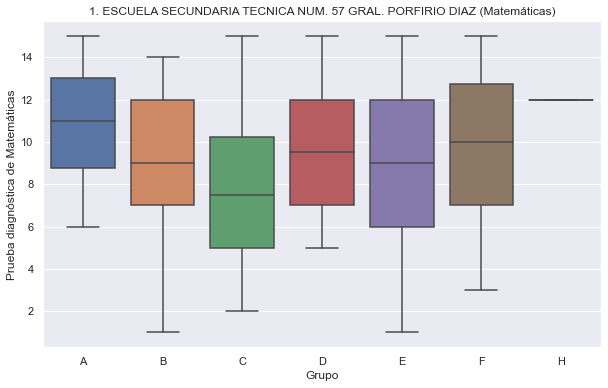

In [23]:
# Case E0
sns.set()
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,6)})            
ax=sns.boxplot( x=df_MAT_E0["Grupo"], y=df_MAT_E0["Prueba diagnóstica de Matemáticas"] );
ax.set_title('1. ESCUELA SECUNDARIA TECNICA NUM. 57 GRAL. PORFIRIO DIAZ (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()


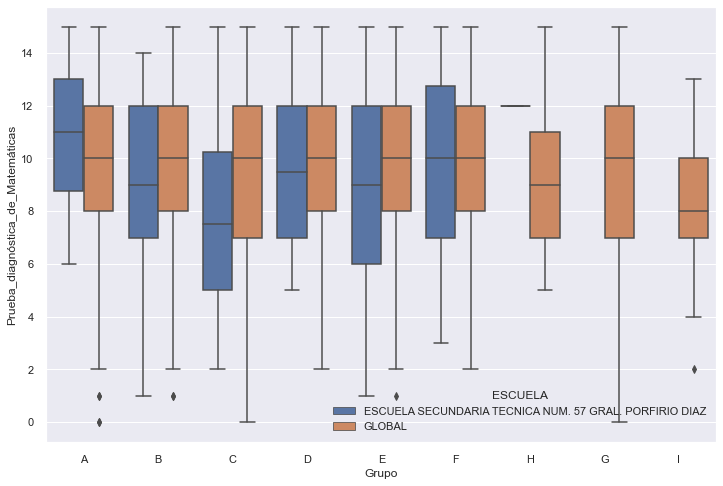

In [21]:
# Comparison of E0 with GLOBAL
# Case E0 vs GLOBAL
sns.set()
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
sns.boxplot(x = result0['Grupo'], 
            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result0['ESCUELA'])
#sns.violinplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'], split=True)

ax.set_title('1. ESCUELA SECUNDARIA TECNICA NUM. 57 GRAL. PORFIRIO DIAZ vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()


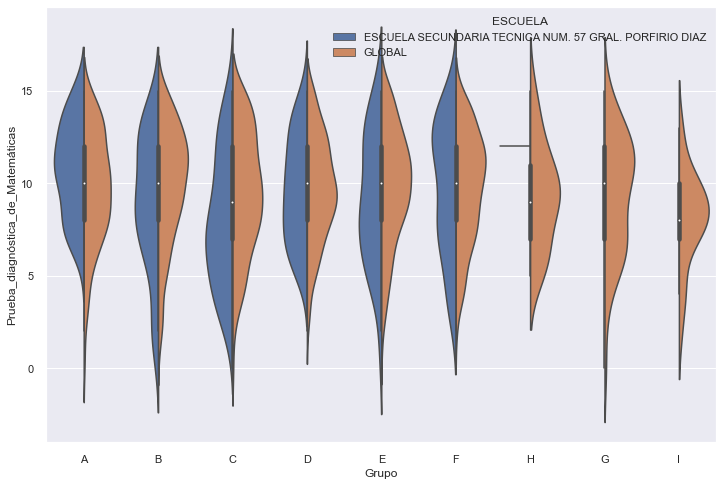

In [22]:
# Comparison of E0 with GLOBAL
# Case E0 vs GLOBAL Violinplot
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
#sns.boxplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'])
sns.violinplot(x = result0['Grupo'], 
            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result0['ESCUELA'], split=True)
ax.set_title('1. ESCUELA SECUNDARIA TECNICA NUM. 57 GRAL. PORFIRIO DIAZ vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()


<Figure size 1440x576 with 0 Axes>

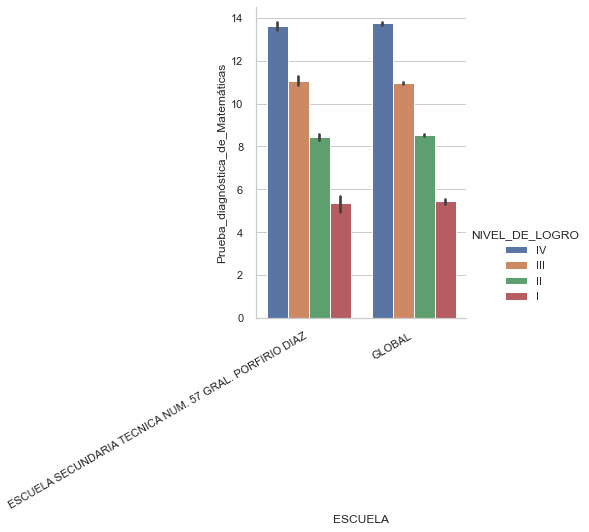

In [52]:
# Comparison of E0 with GLOBAL
# Case E0 vs GLOBAL
sns.set()
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))

bar=sns.catplot(x = 'ESCUELA', 
           y = 'Prueba_diagnóstica_de_Matemáticas', 
            hue = 'NIVEL_DE_LOGRO', kind="bar", data=result0)
bar.set_xticklabels(rotation=30, ha= 'right');
#bar.set_title('1. ESCUELA SECUNDARIA TECNICA NUM. 57 GRAL. PORFIRIO DIAZ vs. GLOBAL (Matemáticas)')
#bar.set_ylabel('Prueba diagnóstica de Matemáticas')
plt.show()



#sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

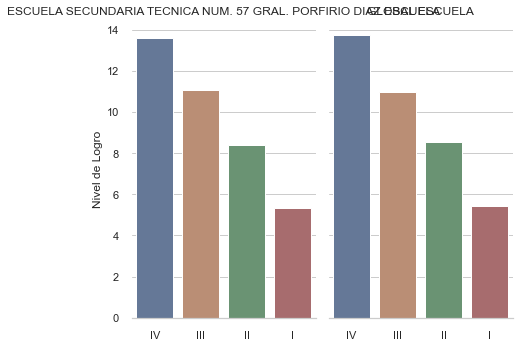

In [57]:
g = sns.catplot(x="NIVEL_DE_LOGRO", y="Prueba_diagnóstica_de_Matemáticas", col="ESCUELA",
...                 data=result0, saturation=.5,
...                 kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Nivel de Logro")
...   .set_xticklabels(["IV", "III", "II", "I"])
...   .set_titles("{col_name} {col_var}")
#...   .set(ylim=(0, 1))
...   .despine(left=True))

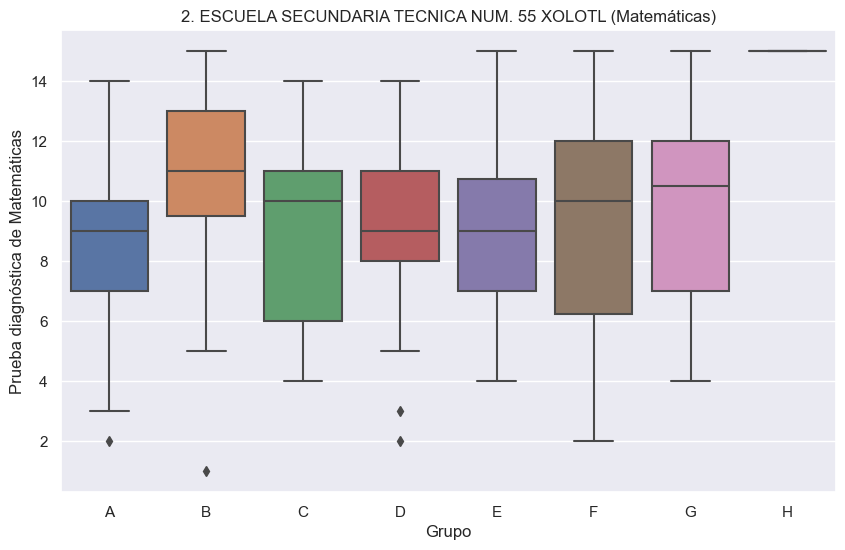

<Figure size 1000x600 with 0 Axes>

In [185]:
# Case E1
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,6)})            
ax=sns.boxplot( x=df_MAT_E1["Grupo"], y=df_MAT_E1["Prueba_diagnóstica_de_Matemáticas"] );
ax.set_title('2. ESCUELA SECUNDARIA TECNICA NUM. 55 XOLOTL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')
plt.figure()
plt.show()


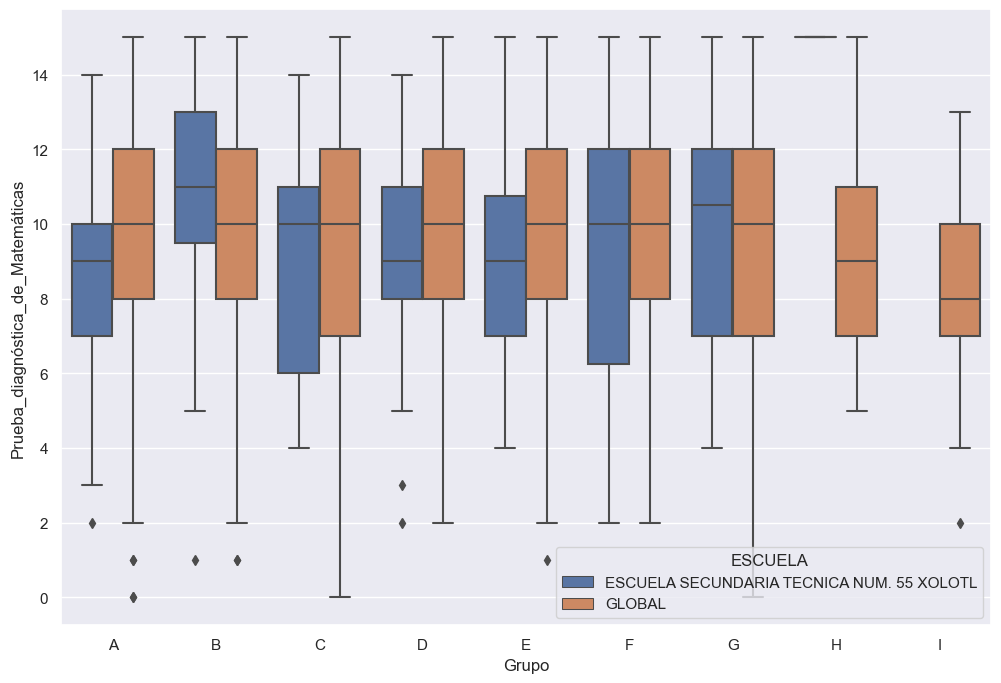

In [186]:
# Comparison of E1 with GLOBAL
# Case E1 vs GLOBAL
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
sns.boxplot(x = result1['Grupo'], 
            y = result1['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result1['ESCUELA'])
#sns.violinplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'], split=True)

ax.set_title('2. ESCUELA SECUNDARIA TECNICA NUM. 55 XOLOTL vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()


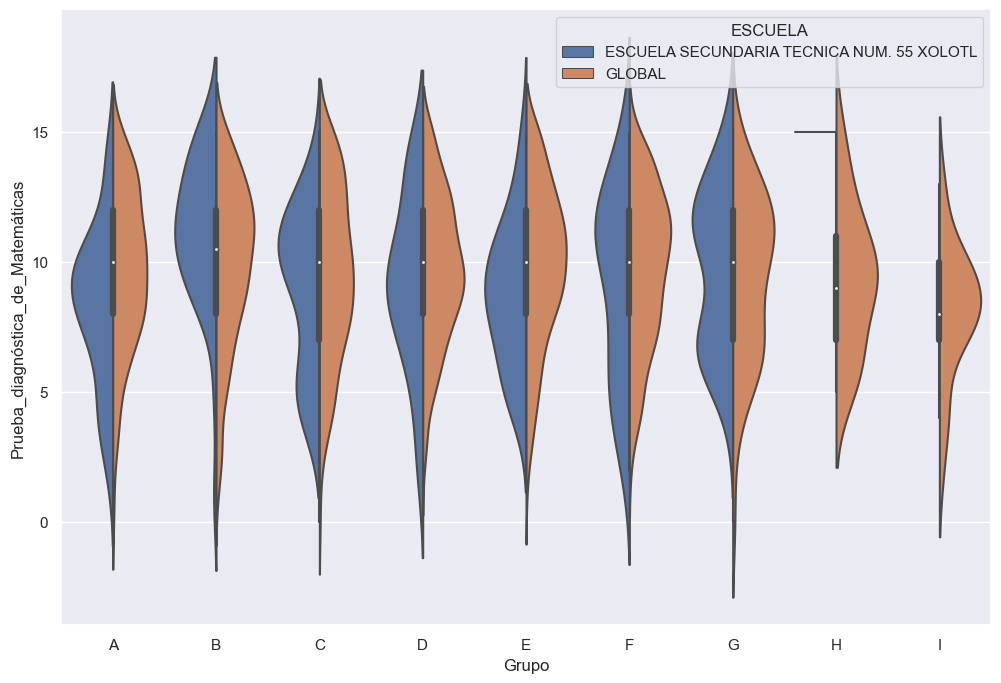

In [187]:
# Comparison of E1 with GLOBAL
# Case E1 vs GLOBAL Violinplot
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
#sns.boxplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'])
sns.violinplot(x = result1['Grupo'], 
            y = result1['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result1['ESCUELA'], split=True)
ax.set_title('2. ESCUELA SECUNDARIA TECNICA NUM. 55 XOLOTL vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()

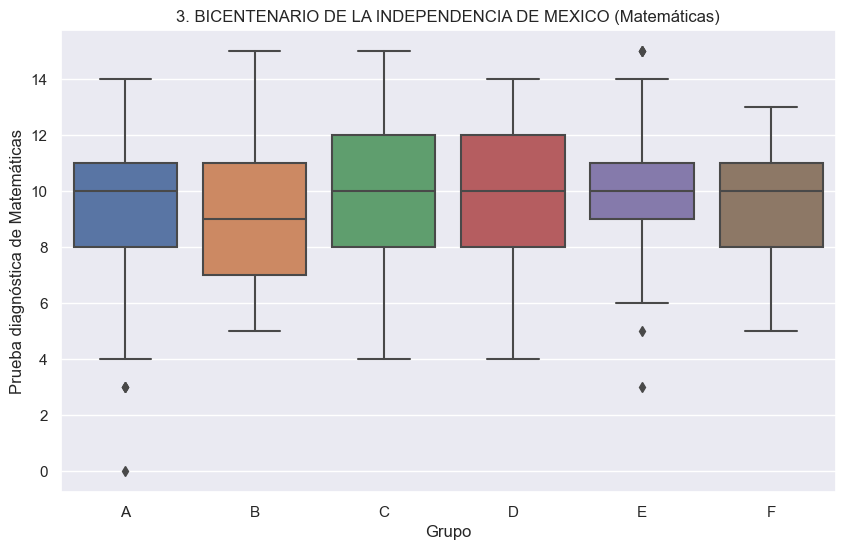

<Figure size 1000x600 with 0 Axes>

In [188]:
# Case E2
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,6)})            
ax=sns.boxplot( x=df_MAT_E2["Grupo"], y=df_MAT_E2["Prueba_diagnóstica_de_Matemáticas"] );
ax.set_title('3. BICENTENARIO DE LA INDEPENDENCIA DE MEXICO (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')
plt.figure()
plt.show()


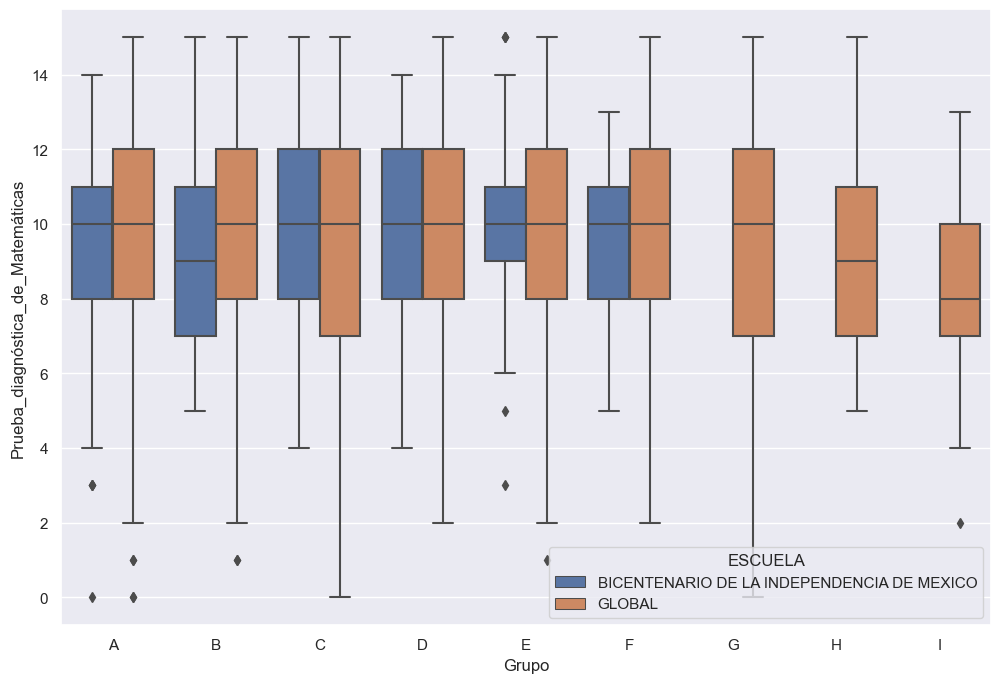

In [189]:
# Comparison of E2 with GLOBAL
# Case E2 vs GLOBAL
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
sns.boxplot(x = result2['Grupo'], 
            y = result2['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result2['ESCUELA'])
#sns.violinplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'], split=True)

ax.set_title('3. BICENTENARIO DE LA INDEPENDENCIA DE MEXICO vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()


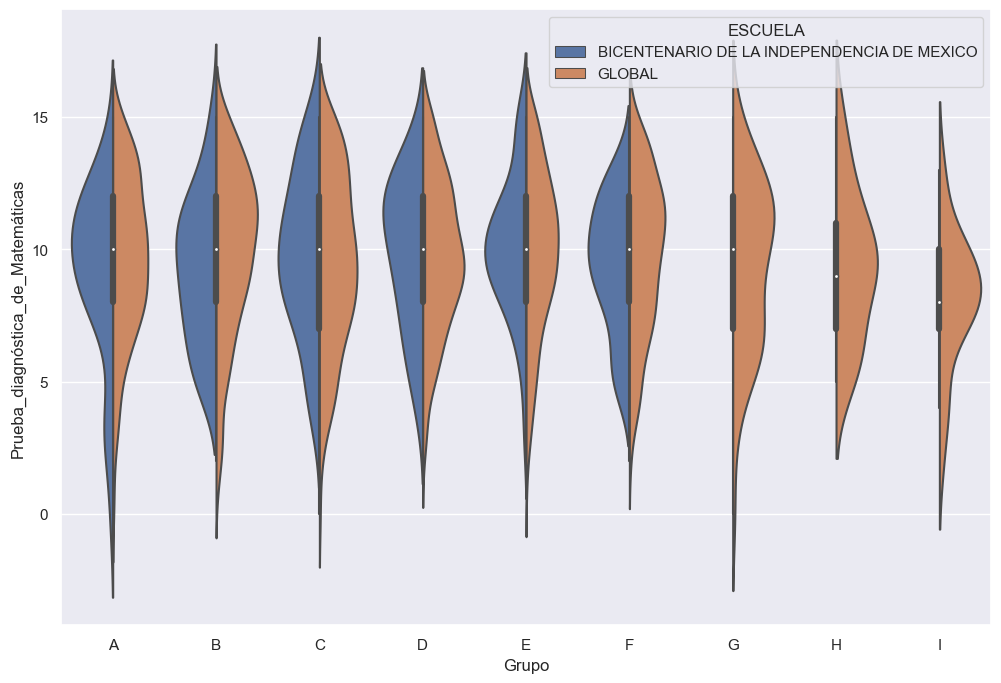

In [190]:
# Comparison of E2 with GLOBAL
# Case E2 vs GLOBAL Violinplot
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
#sns.boxplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'])
sns.violinplot(x = result2['Grupo'], 
            y = result2['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result2['ESCUELA'], split=True)
ax.set_title('3. BICENTENARIO DE LA INDEPENDENCIA DE MEXICO vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()

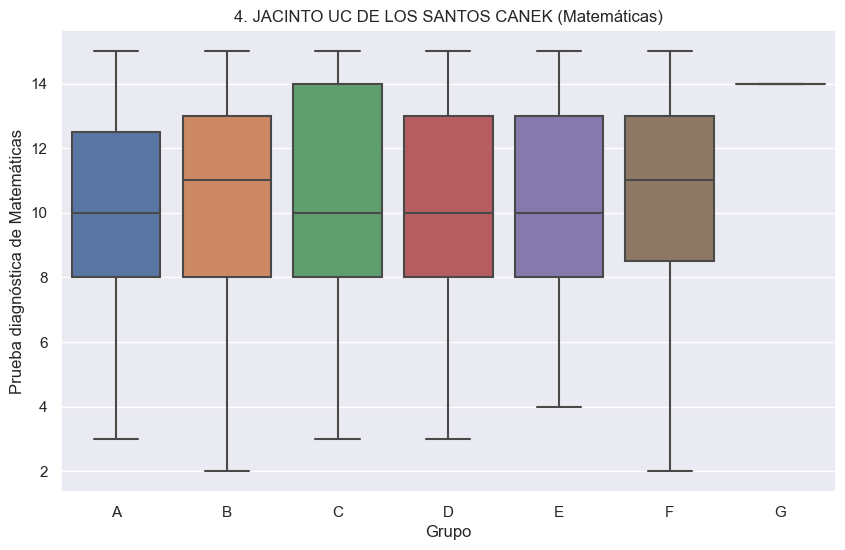

<Figure size 1000x600 with 0 Axes>

In [191]:
# Case E3
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,6)})            
ax=sns.boxplot( x=df_MAT_E3["Grupo"], y=df_MAT_E3["Prueba_diagnóstica_de_Matemáticas"] );
ax.set_title('4. JACINTO UC DE LOS SANTOS CANEK (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')
plt.figure()
plt.show()



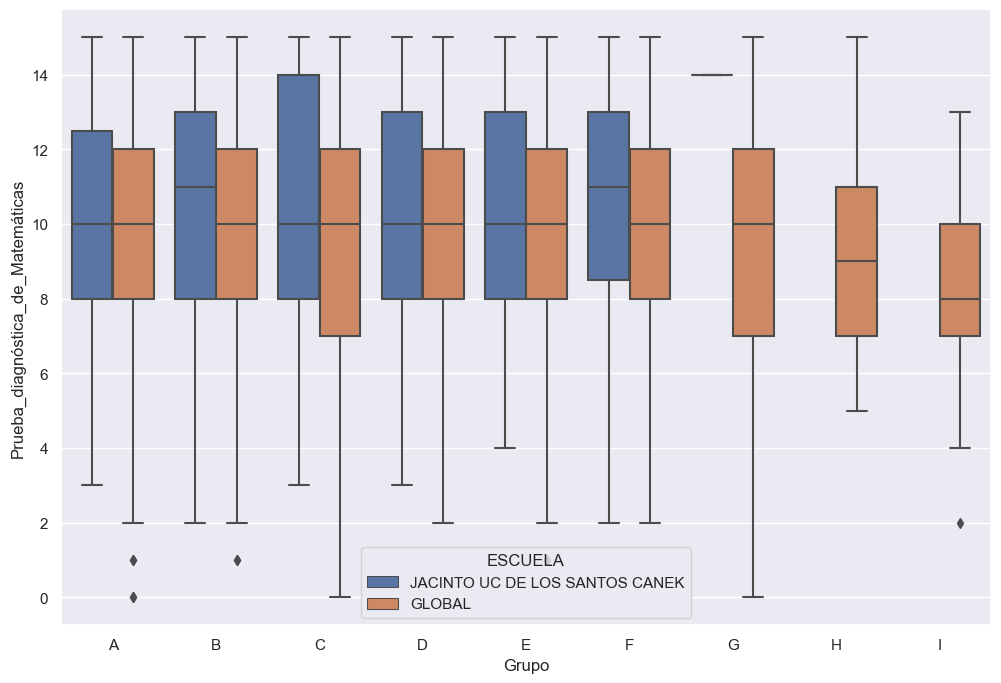

In [192]:
# Comparison of E3 with GLOBAL
# Case E3 vs GLOBAL
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
sns.boxplot(x = result3['Grupo'], 
            y = result3['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result3['ESCUELA'])
#sns.violinplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'], split=True)

ax.set_title('4. JACINTO UC DE LOS SANTOS CANEK vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()


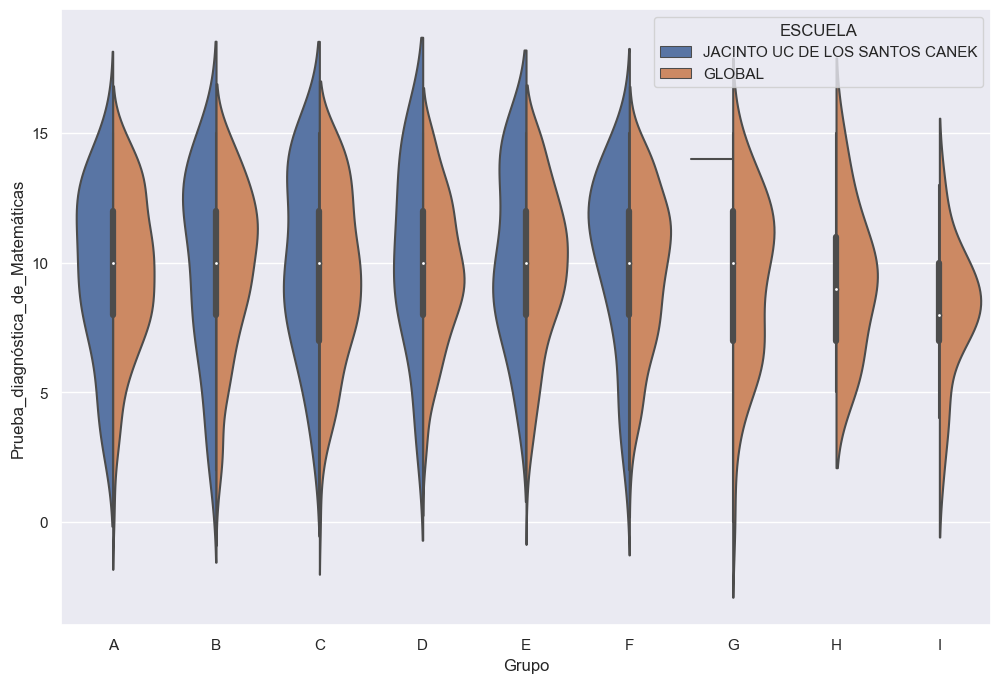

In [193]:
# Comparison of E3 with GLOBAL
# Case E3 vs GLOBAL Violinplot
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
#sns.boxplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'])
sns.violinplot(x = result3['Grupo'], 
            y = result3['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result3['ESCUELA'], split=True)
ax.set_title('4. JACINTO UC DE LOS SANTOS CANEK vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()

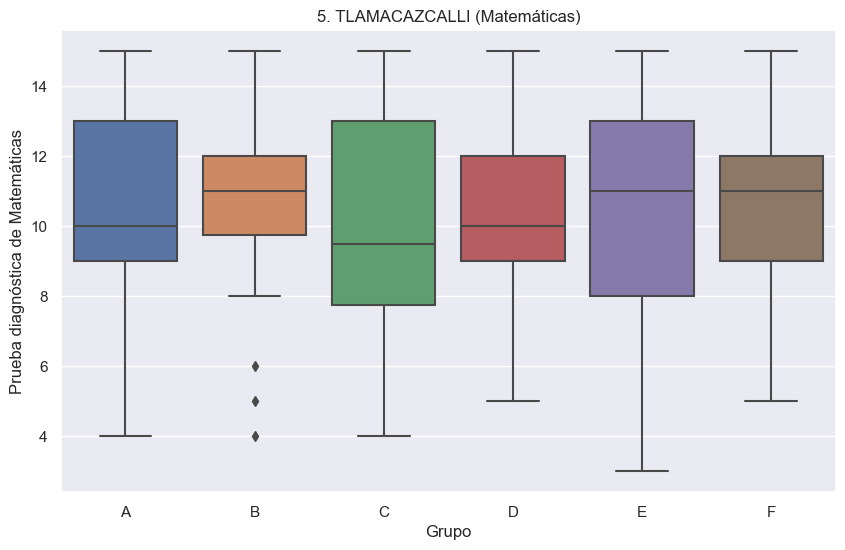

<Figure size 1000x600 with 0 Axes>

In [194]:
# Case E4
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,6)})            
ax=sns.boxplot( x=df_MAT_E4["Grupo"], y=df_MAT_E4["Prueba_diagnóstica_de_Matemáticas"] );
ax.set_title('5. TLAMACAZCALLI (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')
plt.figure()
plt.show()


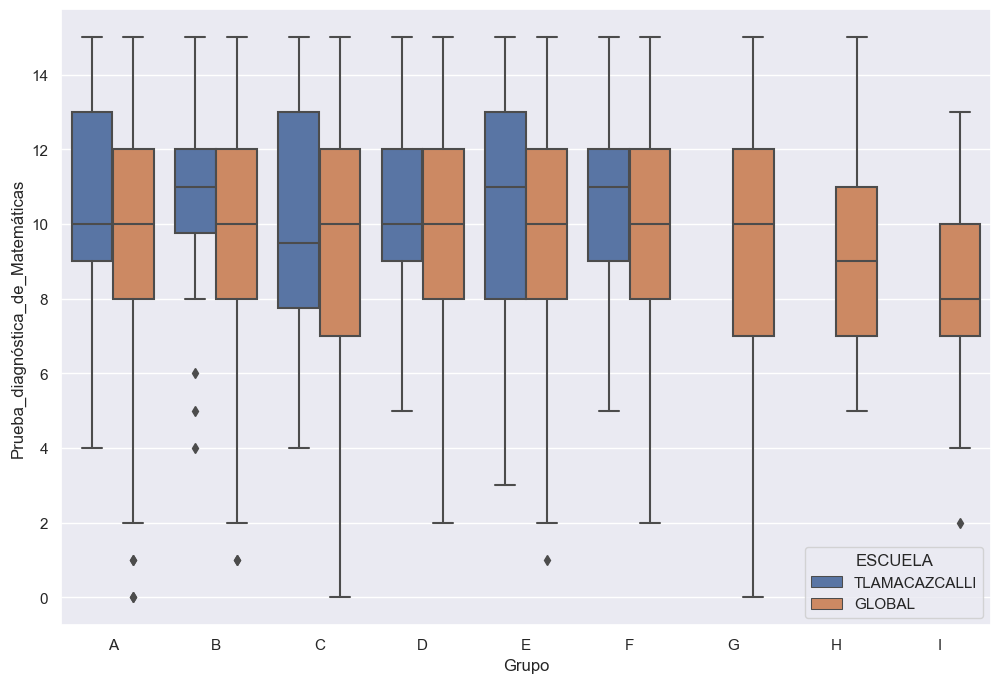

In [195]:
# Comparison of E4 with GLOBAL
# Case E4 vs GLOBAL
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
sns.boxplot(x = result4['Grupo'], 
            y = result4['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result4['ESCUELA'])
#sns.violinplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'], split=True)

ax.set_title('5. TLAMACAZCALLI vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()



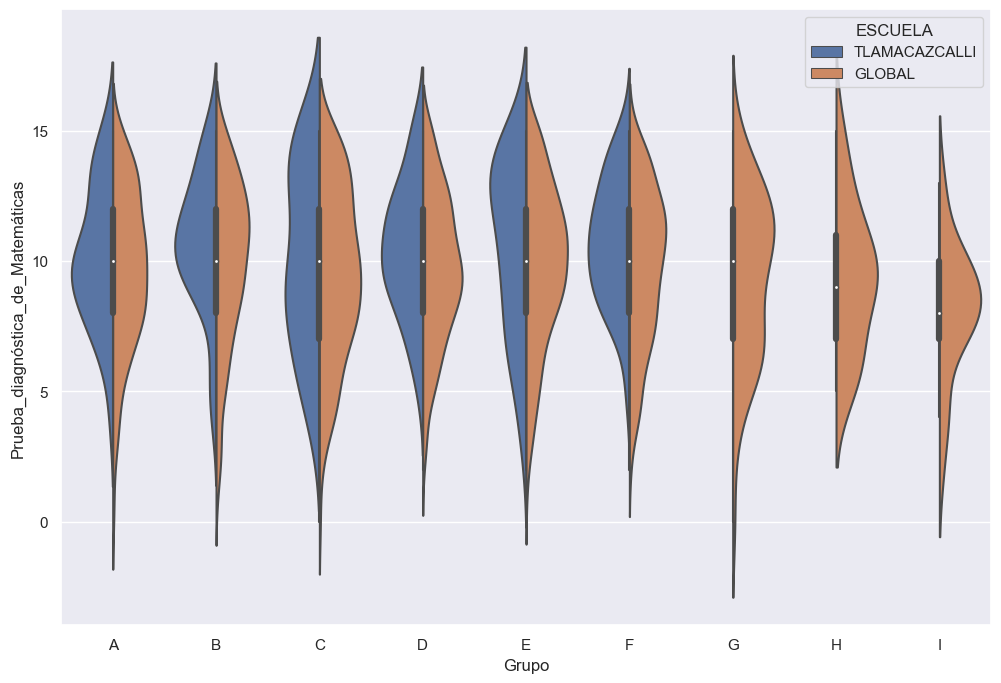

In [196]:
# Comparison of E4 with GLOBAL
# Case E4 vs GLOBAL Violinplot
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
#sns.boxplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'])
sns.violinplot(x = result4['Grupo'], 
            y = result4['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result4['ESCUELA'], split=True)
ax.set_title('5. TLAMACAZCALLI vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()

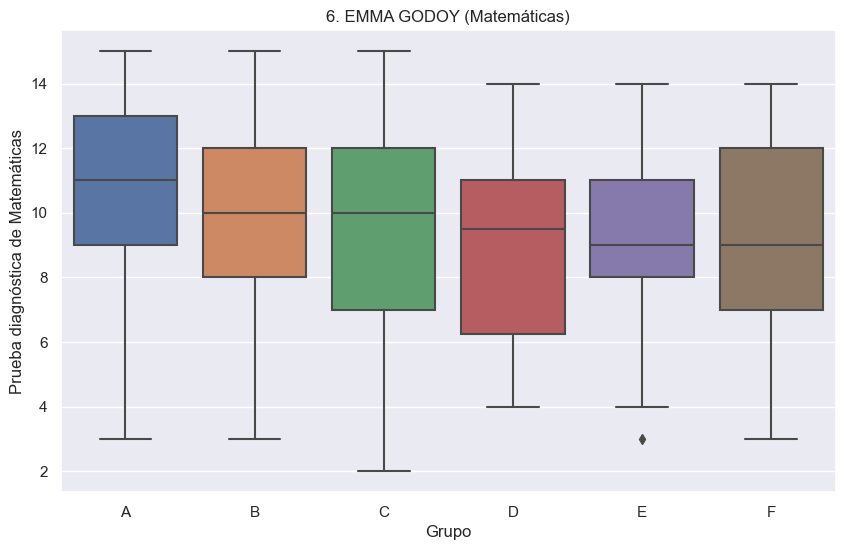

<Figure size 1000x600 with 0 Axes>

In [197]:
# Case E5
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,6)})            
ax=sns.boxplot( x=df_MAT_E5["Grupo"], y=df_MAT_E5["Prueba_diagnóstica_de_Matemáticas"] );
ax.set_title('6. EMMA GODOY (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')
plt.figure()
plt.show()


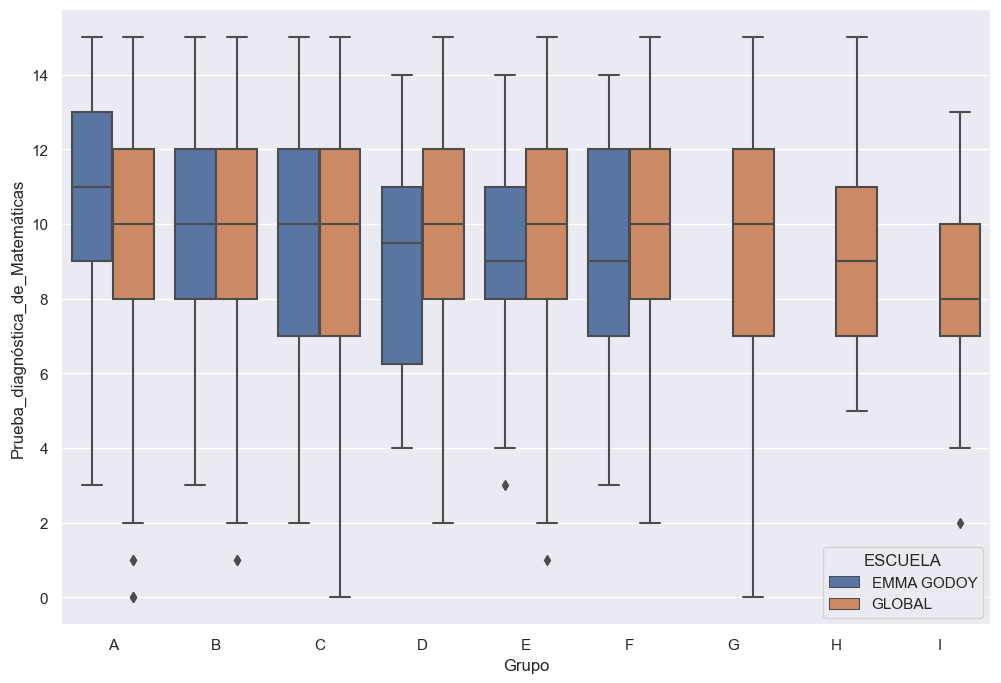

In [198]:
# Comparison of E5 with GLOBAL
# Case E5 vs GLOBAL
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
sns.boxplot(x = result5['Grupo'], 
            y = result5['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result5['ESCUELA'])
#sns.violinplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'], split=True)

ax.set_title('6. EMMA GODOY vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()


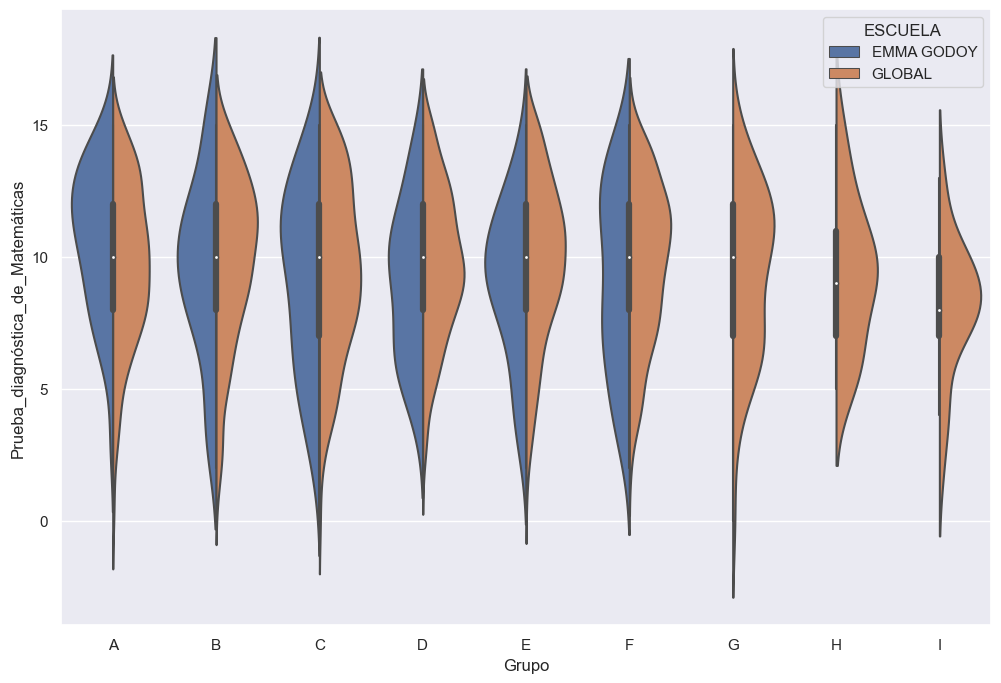

In [199]:
# Comparison of E5 with GLOBAL
# Case E5 vs GLOBAL Violinplot
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
#sns.boxplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'])
sns.violinplot(x = result5['Grupo'], 
            y = result5['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result5['ESCUELA'], split=True)
ax.set_title('6. EMMA GODOY vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()


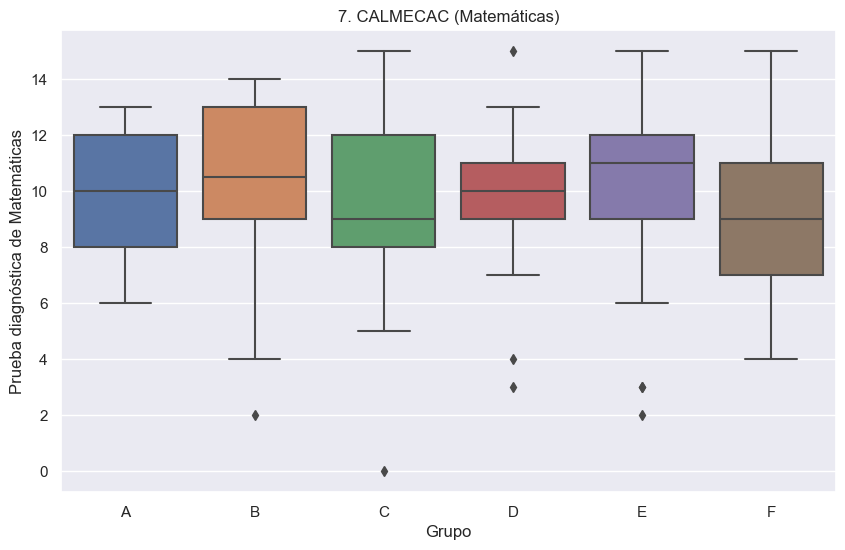

<Figure size 1000x600 with 0 Axes>

In [200]:
# Case E6
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,6)})            
ax=sns.boxplot( x=df_MAT_E6["Grupo"], y=df_MAT_E6["Prueba_diagnóstica_de_Matemáticas"] );
ax.set_title('7. CALMECAC (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')
plt.figure()
plt.show()


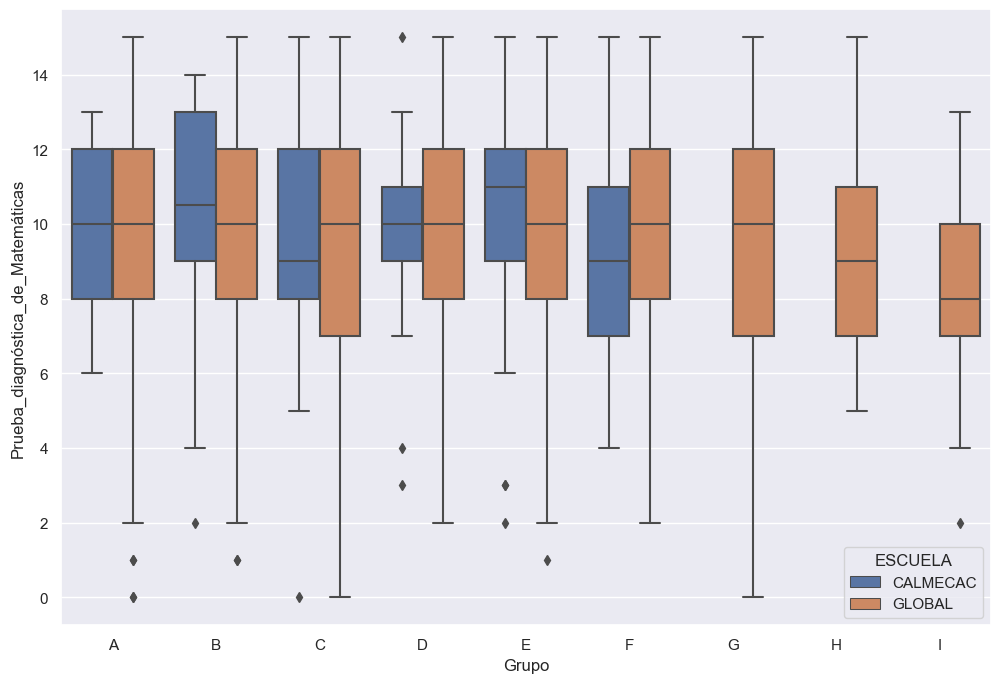

In [201]:
# Comparison of E6 with GLOBAL
# Case E6 vs GLOBAL
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
sns.boxplot(x = result6['Grupo'], 
            y = result6['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result6['ESCUELA'])
#sns.violinplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'], split=True)

ax.set_title('7. CALMECAC vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()



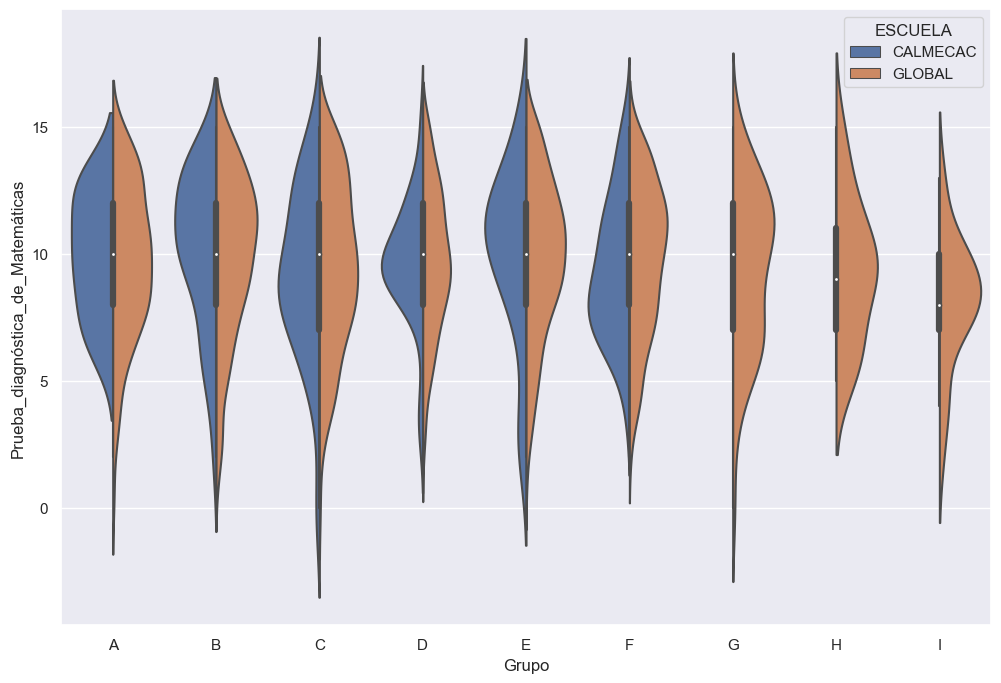

In [202]:
# Comparison of E6 with GLOBAL
# Case E6 vs GLOBAL Violinplot
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
#sns.boxplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'])
sns.violinplot(x = result6['Grupo'], 
            y = result6['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result6['ESCUELA'], split=True)
ax.set_title('7. CALMECAC vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()


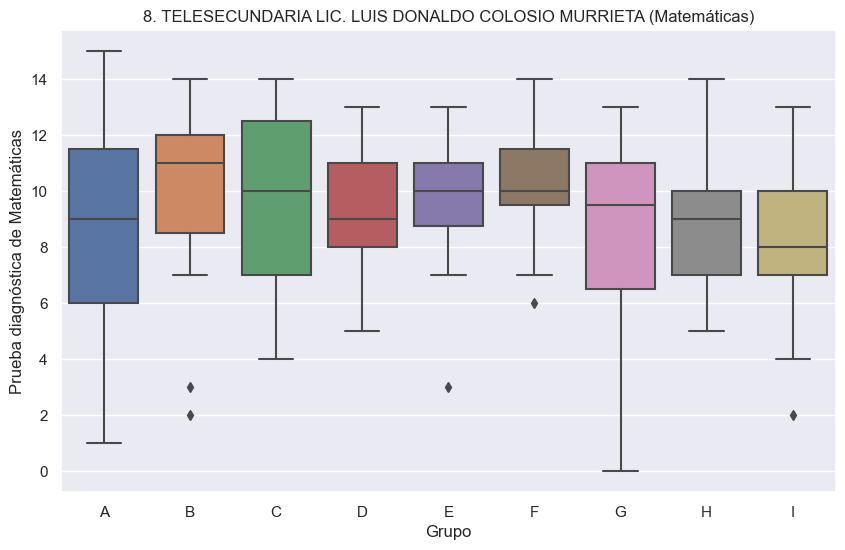

<Figure size 1000x600 with 0 Axes>

In [203]:
# Case E7
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,6)})            
ax=sns.boxplot( x=df_MAT_E7["Grupo"], y=df_MAT_E7["Prueba_diagnóstica_de_Matemáticas"] );
ax.set_title('8. TELESECUNDARIA LIC. LUIS DONALDO COLOSIO MURRIETA (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')
plt.figure()
plt.show()


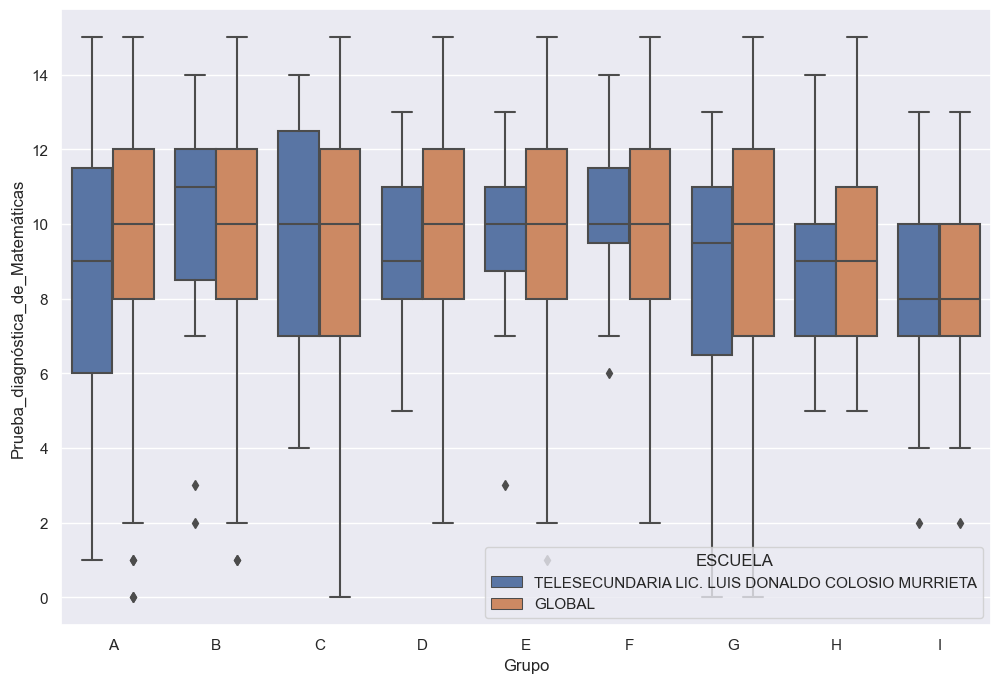

In [204]:
# Comparison of E7 with GLOBAL
# Case E7 vs GLOBAL
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
sns.boxplot(x = result7['Grupo'], 
            y = result7['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result7['ESCUELA'])
#sns.violinplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'], split=True)

ax.set_title('8. TELESECUNDARIA LIC. LUIS DONALDO COLOSIO MURRIETA vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()



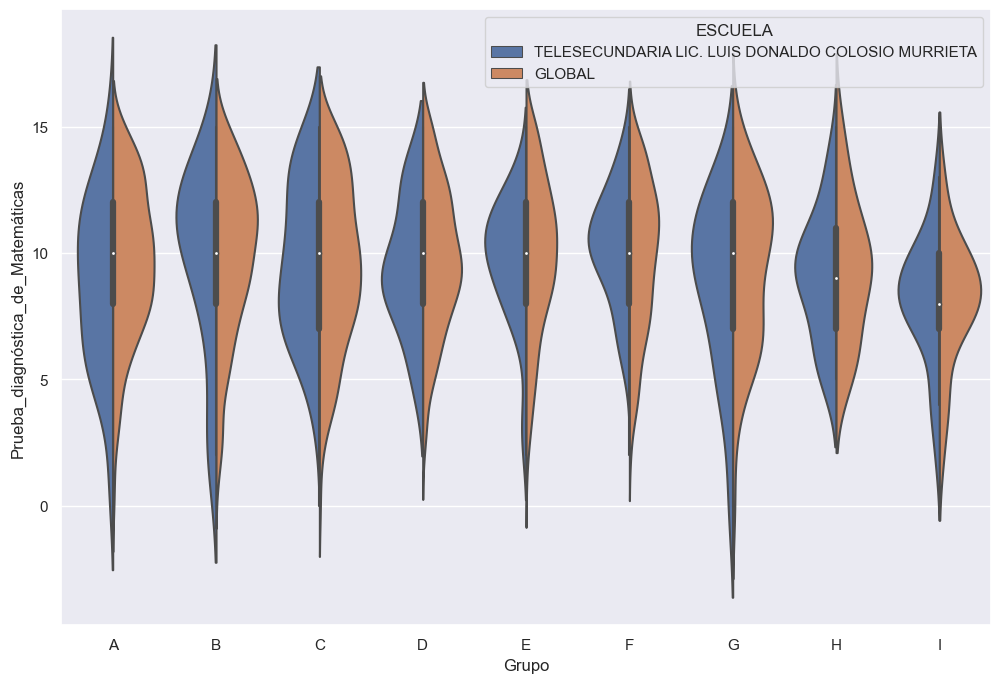

In [205]:
# Comparison of E7 with GLOBAL
# Case E7 vs GLOBAL Violinplot
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
#sns.boxplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'])
sns.violinplot(x = result7['Grupo'], 
            y = result7['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result7['ESCUELA'], split=True)
ax.set_title('8. TELESECUNDARIA LIC. LUIS DONALDO COLOSIO MURRIETA vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()


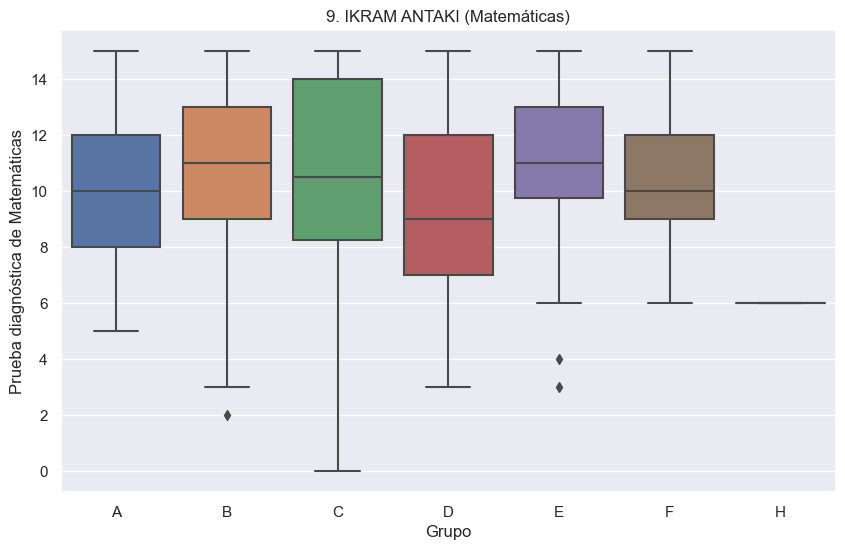

<Figure size 1000x600 with 0 Axes>

In [206]:
# Case E8
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,6)})            
ax=sns.boxplot( x=df_MAT_E8["Grupo"], y=df_MAT_E8["Prueba_diagnóstica_de_Matemáticas"] );
ax.set_title('9. IKRAM ANTAKI (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')
plt.figure()
plt.show()



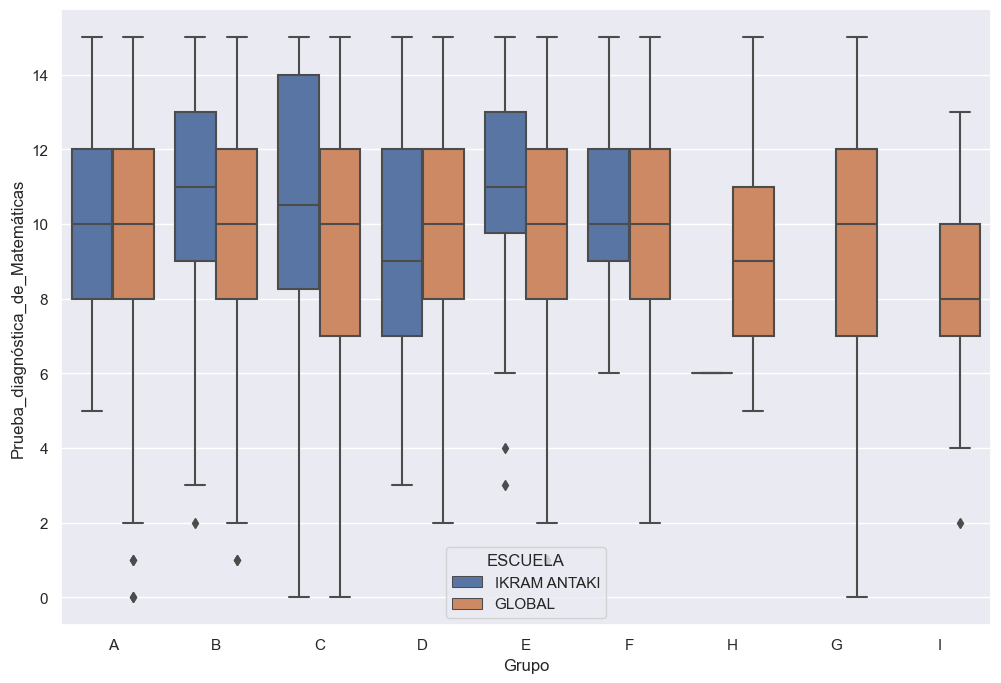

In [207]:
# Comparison of E8 with GLOBAL
# Case E8 vs GLOBAL
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
sns.boxplot(x = result8['Grupo'], 
            y = result8['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result8['ESCUELA'])
#sns.violinplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'], split=True)

ax.set_title('9. IKRAM ANTAKI vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()


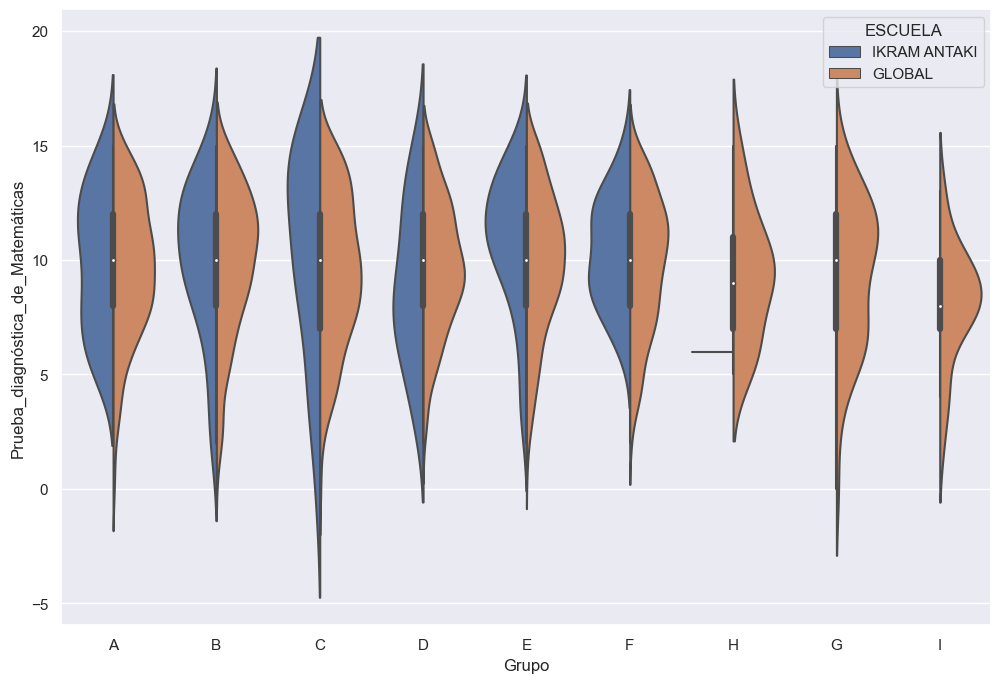

In [208]:
# Comparison of E8 with GLOBAL
# Case E8 vs GLOBAL Violinplot
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
#sns.boxplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'])
sns.violinplot(x = result8['Grupo'], 
            y = result8['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result8['ESCUELA'], split=True)
ax.set_title('9. IKRAM ANTAKI vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()


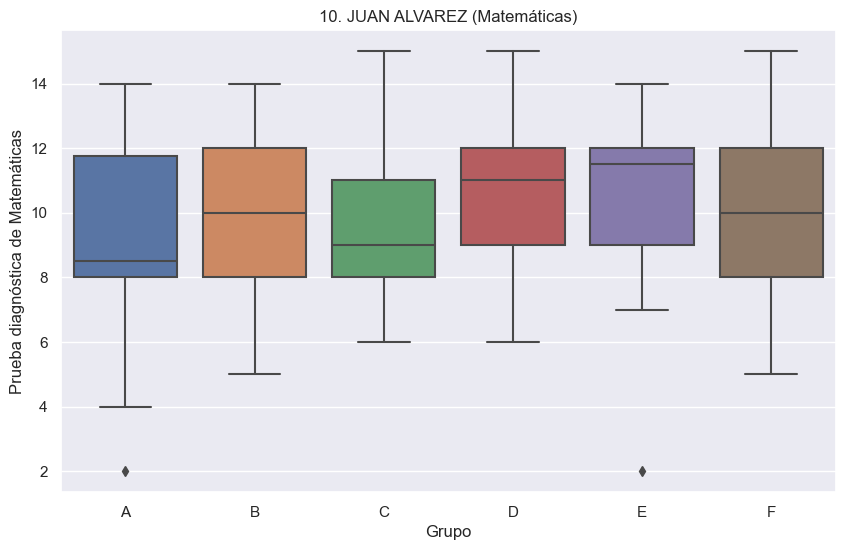

<Figure size 1000x600 with 0 Axes>

In [209]:
# Case E9
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,6)})            
ax=sns.boxplot( x=df_MAT_E9["Grupo"], y=df_MAT_E9["Prueba_diagnóstica_de_Matemáticas"] );
ax.set_title('10. JUAN ALVAREZ (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')
plt.figure()
plt.show()


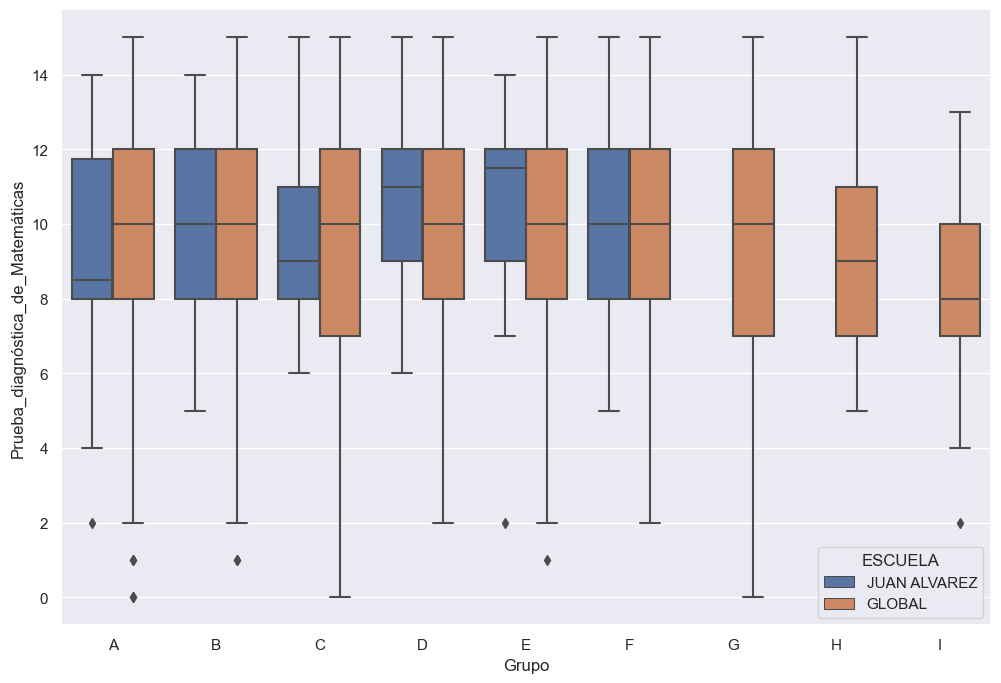

In [210]:
# Comparison of E9 with GLOBAL
# Case E9 vs GLOBAL
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
sns.boxplot(x = result9['Grupo'], 
            y = result9['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result9['ESCUELA'])
#sns.violinplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'], split=True)

ax.set_title('10. JUAN ALVAREZ vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()



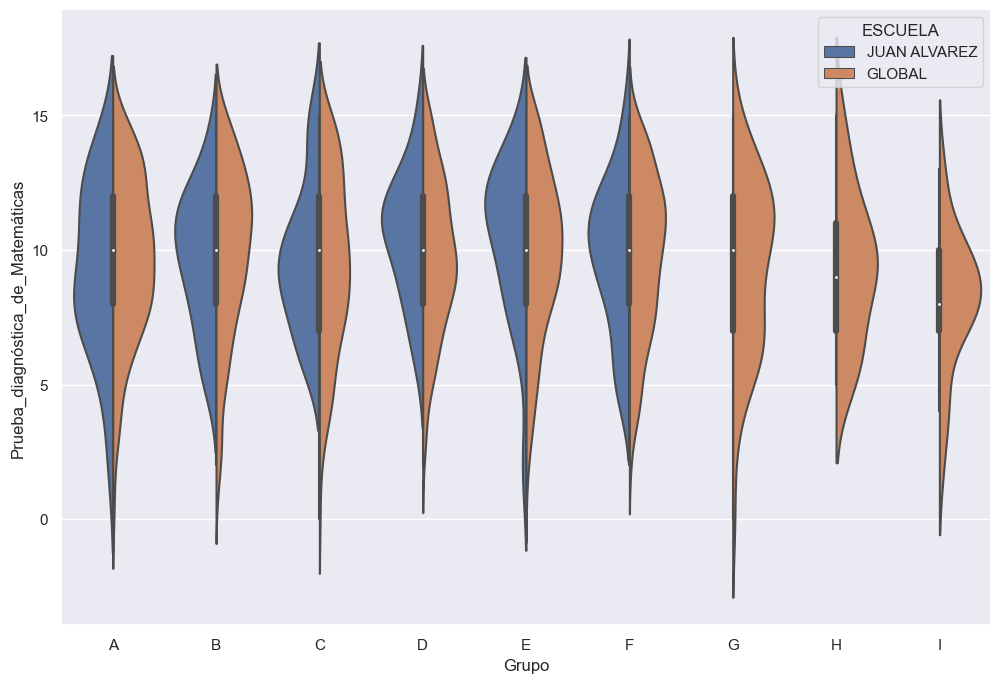

In [211]:
# Comparison of E9 with GLOBAL
# Case E9 vs GLOBAL Violinplot
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
#sns.boxplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'])
sns.violinplot(x = result9['Grupo'], 
            y = result9['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result9['ESCUELA'], split=True)
ax.set_title('10. JUAN ALVAREZ vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()



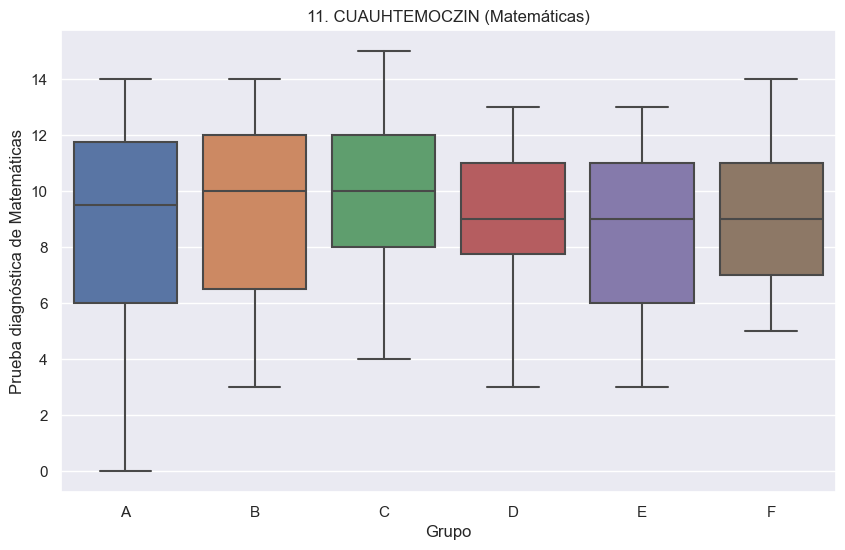

<Figure size 1000x600 with 0 Axes>

In [212]:
# Case E10
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,6)})            
ax=sns.boxplot( x=df_MAT_E10["Grupo"], y=df_MAT_E10["Prueba_diagnóstica_de_Matemáticas"] );
ax.set_title('11. CUAUHTEMOCZIN (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')
plt.figure()
plt.show()


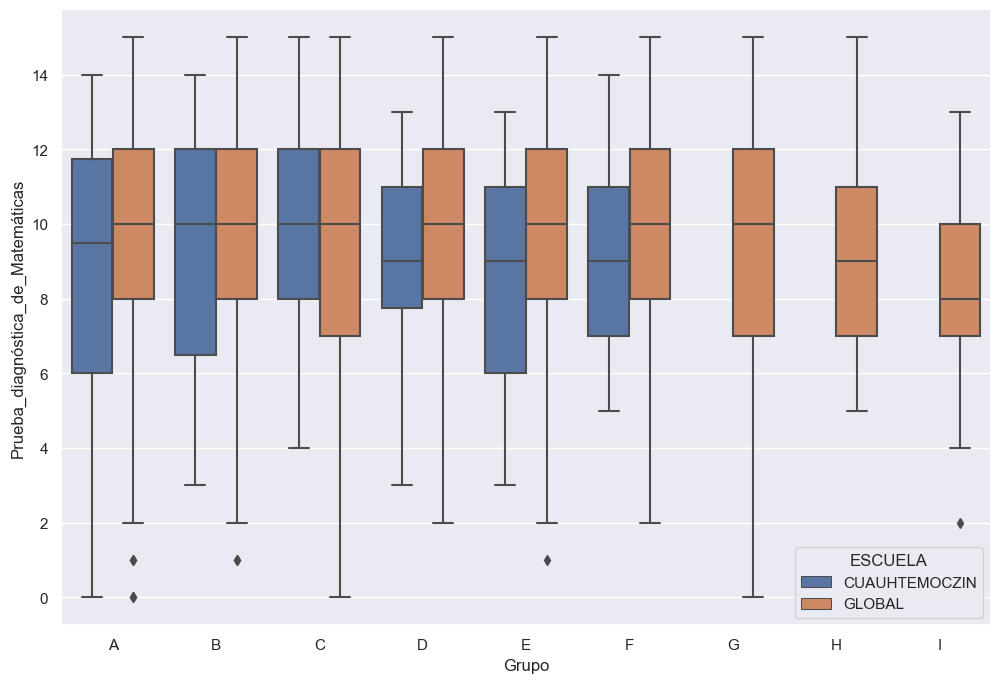

In [213]:
# Comparison of E10 with GLOBAL
# Case E10 vs GLOBAL
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
sns.boxplot(x = result10['Grupo'], 
            y = result10['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result10['ESCUELA'])
#sns.violinplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'], split=True)

ax.set_title('11. CUAUHTEMOCZIN vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()



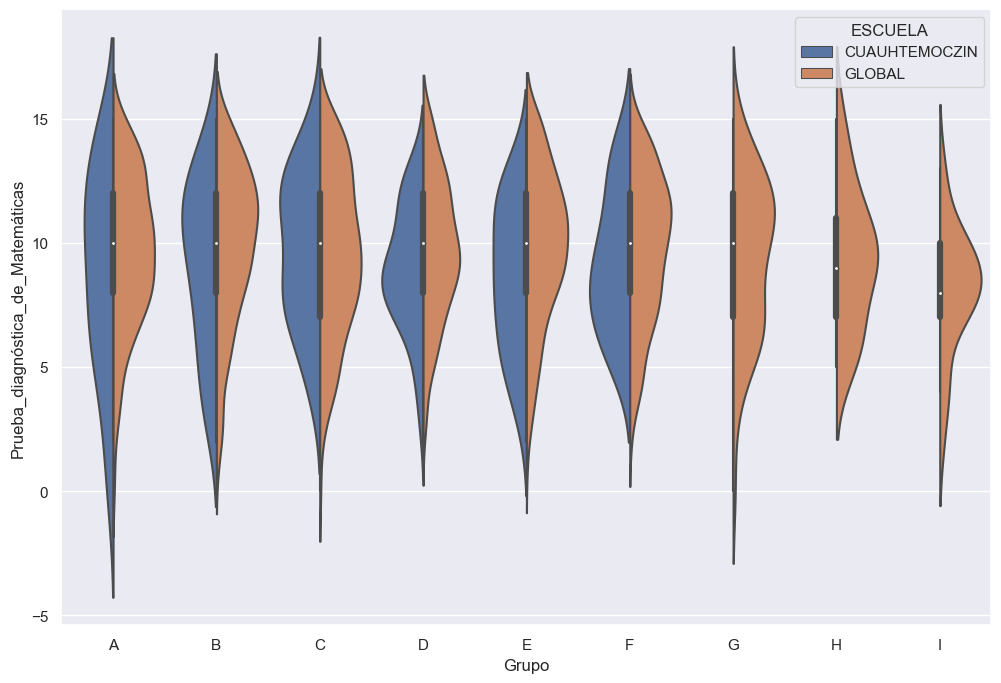

In [214]:
# Comparison of E10 with GLOBAL
# Case E10 vs GLOBAL Violinplot
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
#sns.boxplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'])
sns.violinplot(x = result10['Grupo'], 
            y = result10['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result10['ESCUELA'], split=True)
ax.set_title('11. CUAUHTEMOCZIN vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()


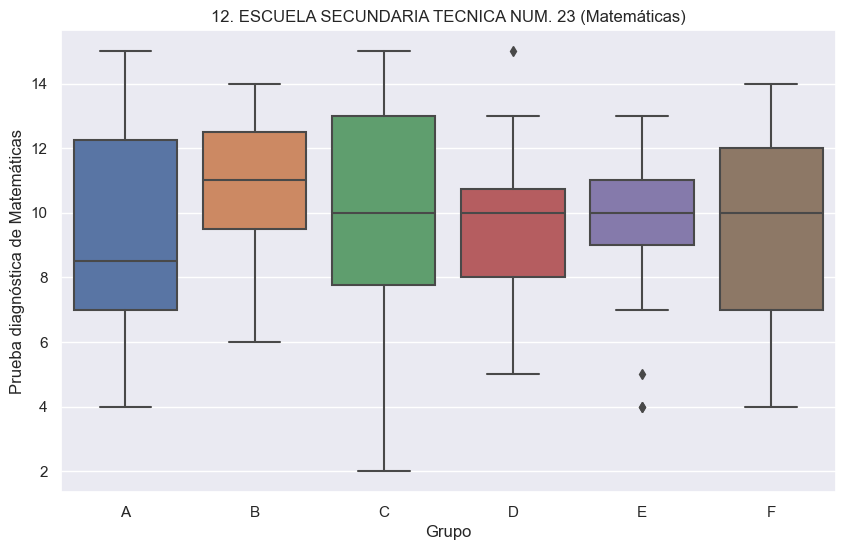

<Figure size 1000x600 with 0 Axes>

In [215]:
# Case E11
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,6)})            
ax=sns.boxplot( x=df_MAT_E11["Grupo"], y=df_MAT_E11["Prueba_diagnóstica_de_Matemáticas"] );
ax.set_title('12. ESCUELA SECUNDARIA TECNICA NUM. 23 (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')
plt.figure()
plt.show()


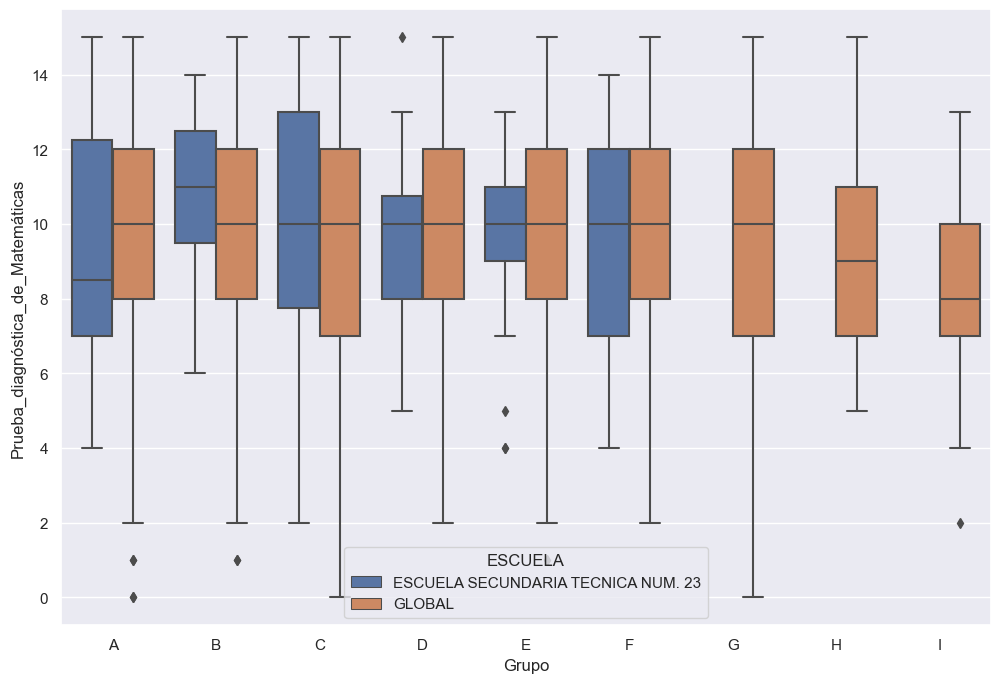

In [216]:
# Comparison of E11 with GLOBAL
# Case E11 vs GLOBAL
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
sns.boxplot(x = result11['Grupo'], 
            y = result11['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result11['ESCUELA'])
#sns.violinplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'], split=True)

ax.set_title('12. ESCUELA SECUNDARIA TECNICA NUM. 23 vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()


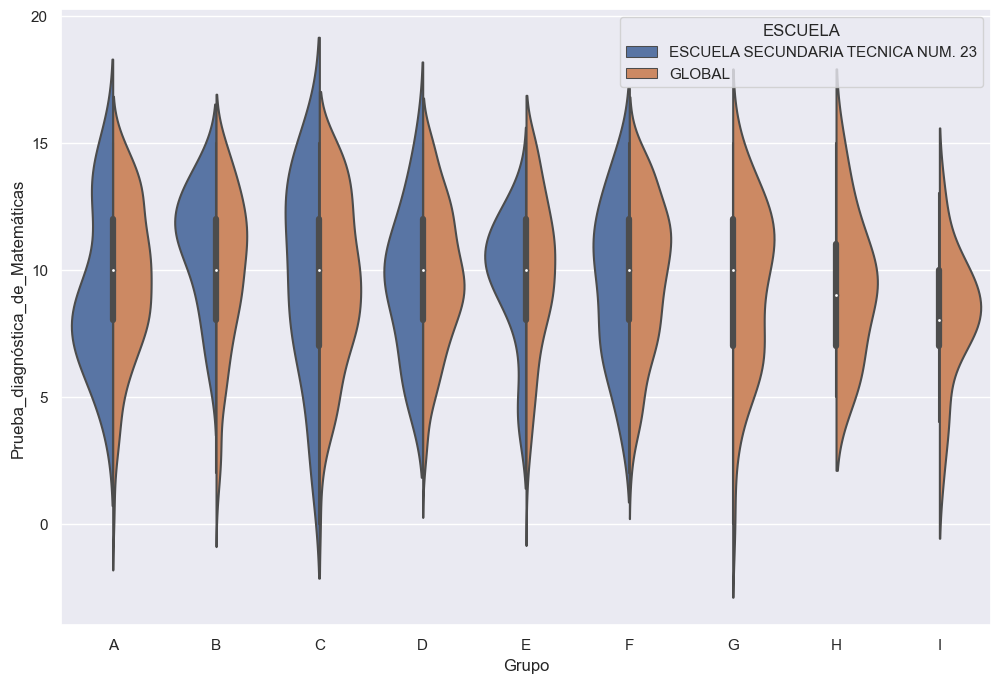

In [217]:
# Comparison of E11 with GLOBAL
# Case E11 vs GLOBAL Violinplot
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
#sns.boxplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'])
sns.violinplot(x = result11['Grupo'], 
            y = result11['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result11['ESCUELA'], split=True)
ax.set_title('12. ESCUELA SECUNDARIA TECNICA NUM. 23 vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()

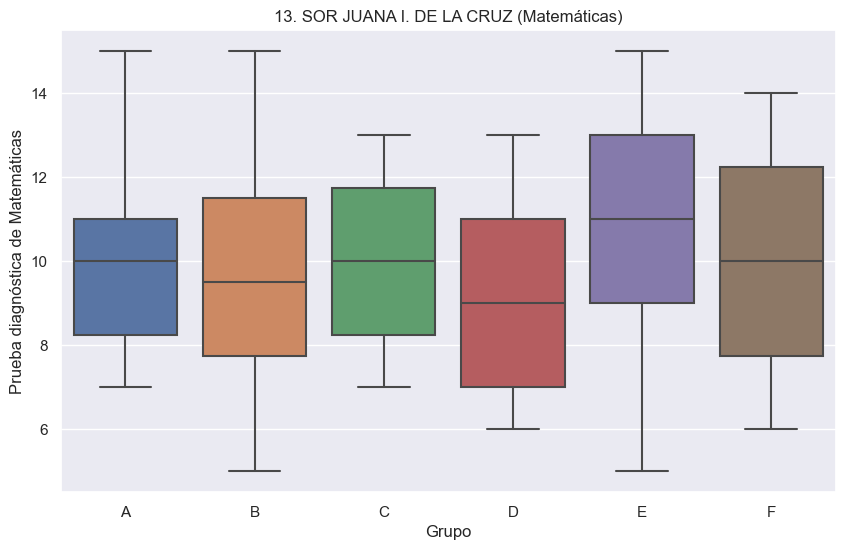

<Figure size 1000x600 with 0 Axes>

In [218]:
# Case E12
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,6)})            
ax=sns.boxplot( x=df_MAT_E12["Grupo"], y=df_MAT_E12["Prueba_diagnóstica_de_Matemáticas"] );
ax.set_title('13. SOR JUANA I. DE LA CRUZ (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')
plt.figure()
plt.show()


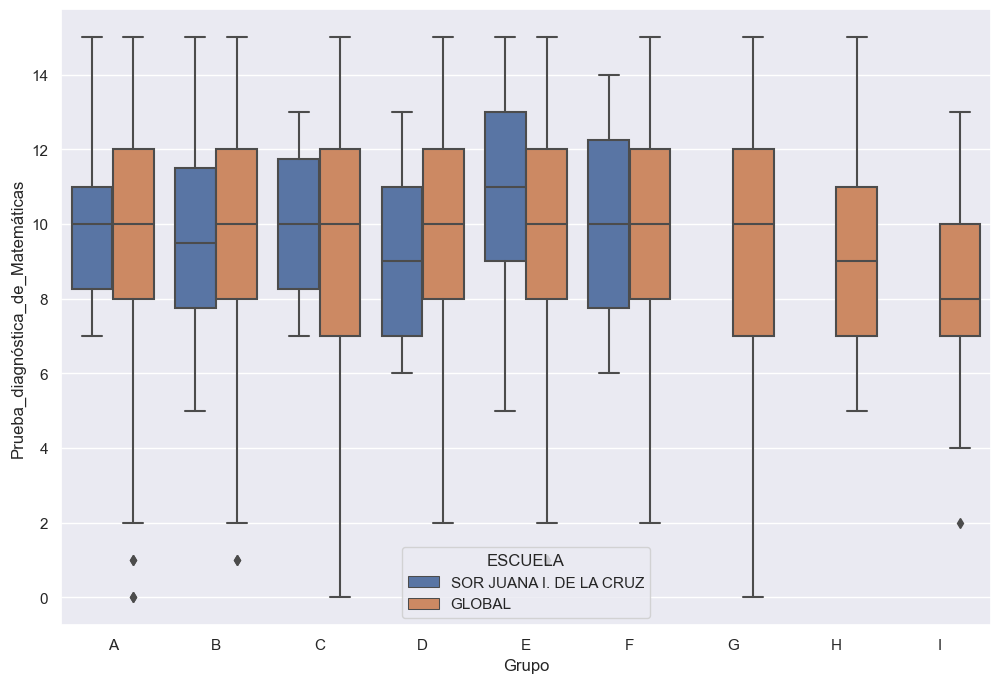

In [219]:
# Comparison of E12 with GLOBAL
# Case E12 vs GLOBAL
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
sns.boxplot(x = result12['Grupo'], 
            y = result12['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result12['ESCUELA'])
#sns.violinplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'], split=True)

ax.set_title('13. SOR JUANA I. DE LA CRUZ vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()


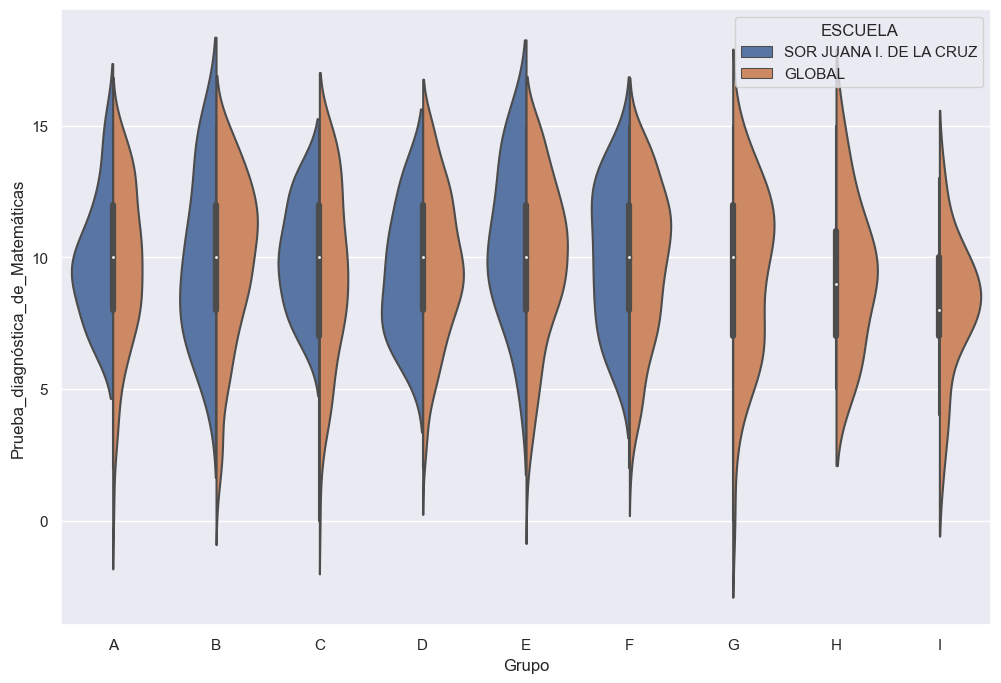

In [220]:
# Comparison of E12 with GLOBAL
# Case E12 vs GLOBAL Violinplot
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
#sns.boxplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'])
sns.violinplot(x = result12['Grupo'], 
            y = result12['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result12['ESCUELA'], split=True)
ax.set_title('13. SOR JUANA I. DE LA CRUZ vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()


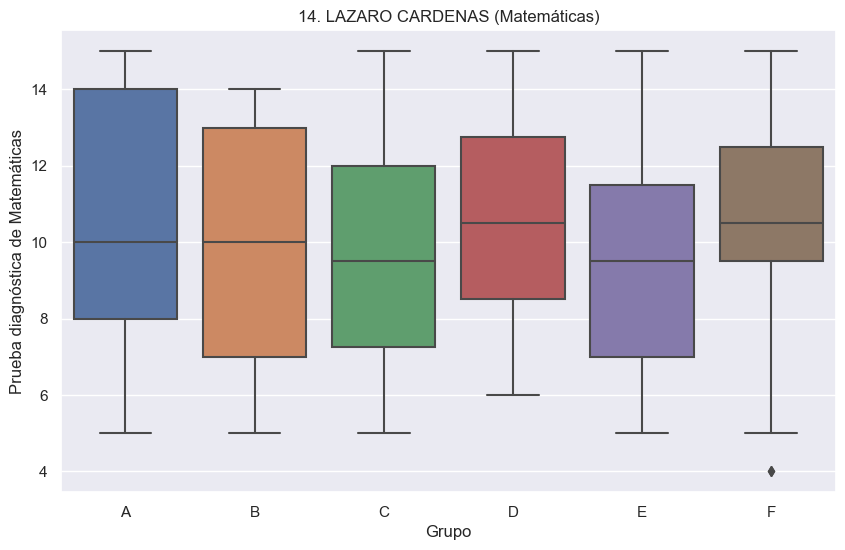

<Figure size 1000x600 with 0 Axes>

In [221]:
# Case E13
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,6)})            
ax=sns.boxplot( x=df_MAT_E13["Grupo"], y=df_MAT_E13["Prueba_diagnóstica_de_Matemáticas"] );
ax.set_title('14. LAZARO CARDENAS (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')
plt.figure()
plt.show()


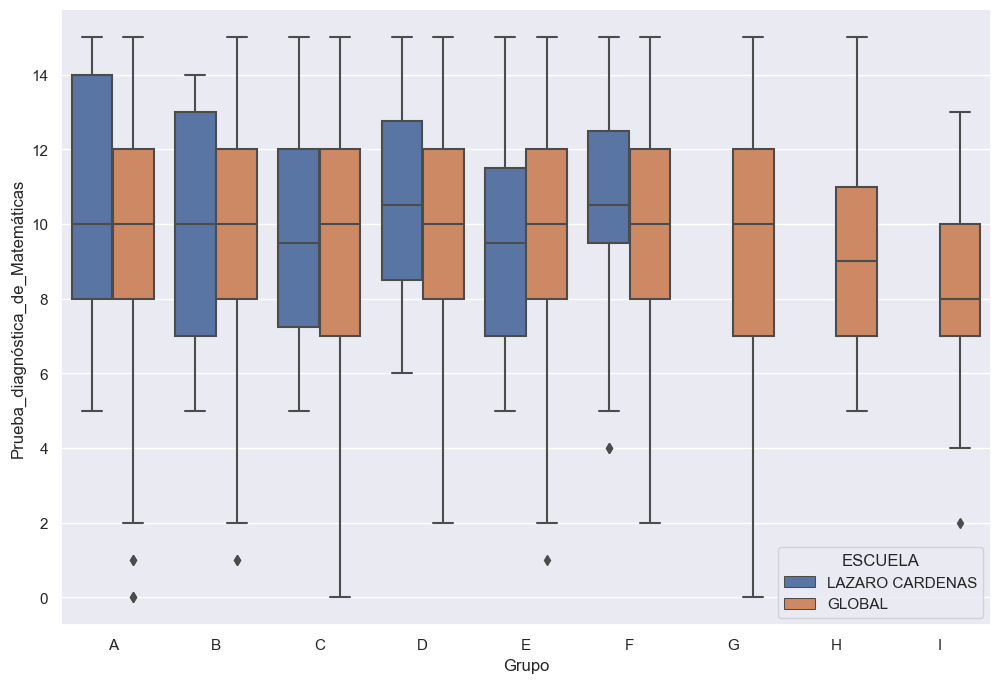

In [222]:
# Comparison of E13 with GLOBAL
# Case E13 vs GLOBAL
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
sns.boxplot(x = result13['Grupo'], 
            y = result13['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result13['ESCUELA'])
#sns.violinplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'], split=True)

ax.set_title('14. LAZARO CARDENAS vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()


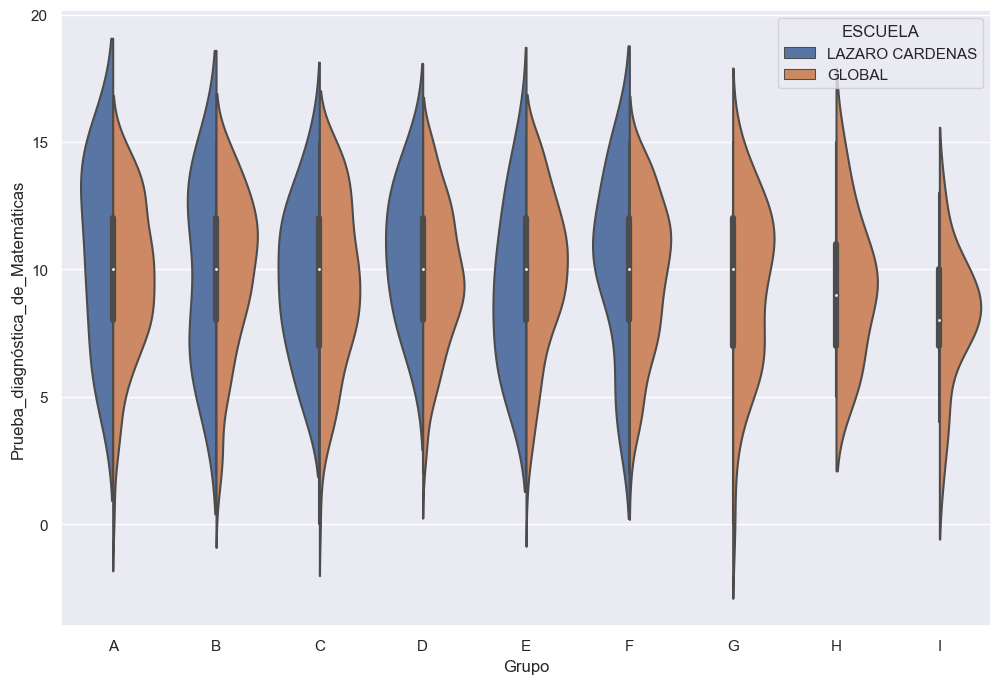

In [223]:
# Comparison of E13 with GLOBAL
# Case E13 vs GLOBAL Violinplot
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})            
#sns.boxplot(x = result0['Grupo'], 
#            y = result0['Prueba_diagnóstica_de_Matemáticas'], 
#            hue = result0['ESCUELA'])
sns.violinplot(x = result13['Grupo'], 
            y = result13['Prueba_diagnóstica_de_Matemáticas'], 
            hue = result13['ESCUELA'], split=True)
ax.set_title('14. LAZARO CARDENAS vs. GLOBAL (Matemáticas)')
ax.set_xlabel('Grupo')
ax.set_ylabel('Prueba diagnóstica de Matemáticas')

plt.show()


In [148]:
print(df_MAT_E.shape)
df_MAT_E.head()

(2405, 3)


,ESCUELA,Grupo,Prueba_diagnóstica_de_Matemáticas
0,LAZARO CARDENAS,A,14.0
1,LAZARO CARDENAS,A,14.0
2,LAZARO CARDENAS,A,13.0
3,LAZARO CARDENAS,A,14.0
4,LAZARO CARDENAS,A,15.0


In [149]:
print(df_MAT_E1.shape)
df_MAT_E1.head()

(216, 3)


,ESCUELA,Grupo,Prueba_diagnóstica_de_Matemáticas
725,ESCUELA SECUNDARIA TECNICA NUM. 55 XOLOTL,A,14.0
726,ESCUELA SECUNDARIA TECNICA NUM. 55 XOLOTL,A,13.0
727,ESCUELA SECUNDARIA TECNICA NUM. 55 XOLOTL,A,14.0
728,ESCUELA SECUNDARIA TECNICA NUM. 55 XOLOTL,A,11.0
729,ESCUELA SECUNDARIA TECNICA NUM. 55 XOLOTL,A,10.0


In [80]:
df_MAT_E0['ESCUELA'].value_counts()

ESCUELA SECUNDARIA TECNICA NUM. 57 GRAL. PORFIRIO DIAZ    247
ESCUELA SECUNDARIA TECNICA NUM. 55 XOLOTL                 216
BICENTENARIO DE LA INDEPENDENCIA DE MEXICO                205
JACINTO UC DE LOS SANTOS CANEK                            203
TLAMACAZCALLI                                             199
EMMA GODOY                                                185
CALMECAC                                                  173
TELESECUNDARIA LIC. LUIS DONALDO COLOSIO MURRIETA         173
IKRAM ANTAKI                                              162
JUAN ALVAREZ                                              149
CUAUHTEMOCZIN                                             144
ESCUELA SECUNDARIA TECNICA NUM. 23                        131
SOR JUANA I. DE LA CRUZ                                   122
LAZARO CARDENAS                                            96
Name: ESCUELA, dtype: int64

In [27]:
# Read the LC file
df_LC = pd.read_excel('LC_Ordenada.xlsx')
df_LC.info()
df_LC.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   APELLIDOS                                      2318 non-null   object 
 1   NOMBRE                                         2318 non-null   object 
 2   ESCUELA                                        2318 non-null   object 
 3   CCT                                            2318 non-null   object 
 4   GRP                                            2318 non-null   object 
 5   n° de lista                                    2318 non-null   float64
 6   Prueba diagnóstica de Lenguaje y Comunicación  2318 non-null   float64
 7   NIVEL DE LOGRO                                 2318 non-null   object 
 8   Tiempo empleado                                2318 non-null   object 
 9   Tiempo2                                        2318 

,APELLIDOS,NOMBRE,ESCUELA,CCT,GRP,n° de lista,Prueba diagnóstica de Lenguaje y Comunicación,NIVEL DE LOGRO,Tiempo empleado,Tiempo2,...,Respuesta 12,Respuesta 13,Respuesta 14,Respuesta 15,TRespuesta 1,TRespuesta 2,TRespuesta 3,TRespuesta 4,TRespuesta 5,TRespuesta 6
0,CERON TREJO,ALISSON GUADALUPE,LAZARO CARDENAS,CCT 15DES0025A,A,10.0,13.0,IV,1 día,1 día,...,B,B,C,C,Fácil,No,-,-,No,-
1,COSIO URRUTIA,ARIAN ELI,LAZARO CARDENAS,CCT 15DES0025A,A,10.0,13.0,IV,23 mins 37 segundos,23 mins 37 segundos,...,B,B,C,C,Fácil,Si,Mamá,Siempre,No,-
2,ROSALES GUERRERO,QUETZALLI,LAZARO CARDENAS,CCT 15DES0025A,A,36.0,13.0,IV,15 mins 19 segundos,15 mins 19 segundos,...,B,B,C,C,No sé,No,-,No sé,No,-
3,AGUILAR CHOLULA,ASHLEY MAYUMI,LAZARO CARDENAS,CCT 15DES0025A,C,1.0,13.0,IV,17 mins,17 mins,...,B,B,C,C,Difícil,No,-,-,No,-
4,HERNANDEZ JIMENEZ,BRUNO JOEL,LAZARO CARDENAS,CCT 15DES0025A,C,16.0,14.0,IV,49 mins 47 segundos,49 mins 47 segundos,...,B,B,C,C,Fácil,Si,Mamá,Algunas veces,No,-


In [28]:
# forming ProfileReport and save 
# as output.html file 
profile_LC = pp.ProfileReport(df_LC) 
profile_LC.to_file("output_LC.html")

In [24]:
df_MAT.groupby(['ESCUELA','Grupo']).agg({'NIVEL DE LOGRO': ['count']}).reset_index()


,ESCUELA,Grupo,NIVEL DE LOGRO
,,,count
0,BICENTENARIO DE LA INDEPENDENCIA DE MEXICO,A,35
1,BICENTENARIO DE LA INDEPENDENCIA DE MEXICO,B,31
2,BICENTENARIO DE LA INDEPENDENCIA DE MEXICO,C,31
3,BICENTENARIO DE LA INDEPENDENCIA DE MEXICO,D,27
4,BICENTENARIO DE LA INDEPENDENCIA DE MEXICO,E,43
...,...,...,...
87,TLAMACAZCALLI,B,32
88,TLAMACAZCALLI,C,28
89,TLAMACAZCALLI,D,36


In [ ]:
# Histogram plots for MAT file
sns.catplot(x="deck", kind="count", palette="ch:.25", data=df_MAT)